## Initializing

In [ ]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import pearsonr
from tqdm import tqdm


warnings.filterwarnings('ignore')

# reminder that if you are installing libraries in a Google Colab instance you will be prompted to restart your kernal

try:
    import geemap, ee
    import seaborn as sns
    import matplotlib.izingpyplot as plt
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap seaborn matplotlib
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
        !conda install seaborn matplotlib -y
    import geemap, ee
    import seaborn as sns
    import matplotlib.pyplot as plt

package not found, installing w/ pip in Google Colab...


In [ ]:
try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_doiqkQG3NJ1t8IS?source=API


In [ ]:
!pip install cmasher
import geocoder
import cmasher as cmr
import geemap.colormaps as cm

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import matplotlib.dates as mdates
from matplotlib import cm

from tqdm import tqdm
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from matplotlib import gridspec
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import datetime
import matplotlib.ticker as mtick
from scipy import stats

import numpy as np
import pandas as pd
import warnings
from scipy.stats import pearsonr

# import geocoder
# import geemap.colormaps as cm

In [ ]:
# !pip install geopandas
# import geopandas as gpd

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

## Displaying shapefiles

In [ ]:
# # gps_path = '/content/gdrive/My Drive/Research - MS/Codes/MS Thesis/MS-Thesis/Shape_Files/PHGE71FL/PHGE71FL.shp'
# # geopath = gpd.read_file(geopath)
# path = '/content/gdrive/My Drive/Research - MS/Codes/MS Thesis/MS-Thesis/Shape_Files/PhilGIS/'
# sf_gpd_country = gpd.read_file(path + "Country (extract.me)/Country.shp")
# sf_gpd_regions = gpd.read_file(path + "Regions (extract.me)/Regions.shp")

In [ ]:
# sf_gpd_municities = gpd.read_file(path + "MuniCities/MuniCities.shp")
# sf_gpd_provinces = gpd.read_file(path + "Provinces/Provinces.shp")
# sf_gpd_roads = gpd.read_file(path + "Roads/roads.shp")

In [ ]:
# plt.figure(dpi = 200)
# plt.subplot(151)
# sf_gpd_country.plot(edgecolor="black", linewidth = 0.5, facecolor="None", ax = plt.gca())
# plt.axis("off")
# plt.subplot(152)
# sf_gpd_regions.plot(edgecolor="red", linewidth = 0.5, facecolor="None", ax = plt.gca())
# plt.rc('font', size = 5)
# plt.axis("off")
# plt.subplot(153)
# sf_gpd_provinces.plot(edgecolor="orange", linewidth = 0.5, facecolor="None", ax = plt.gca())
# plt.rc('font', size = 5)
# plt.axis("off")
# plt.subplot(154)
# sf_gpd_municities.plot(edgecolor="green", linewidth = 0.5, facecolor="None", ax = plt.gca())
# plt.rc('font', size = 5)
# plt.axis("off")
# plt.subplot(155)
# sf_gpd_roads.plot(edgecolor="blue", linewidth = 0.5, facecolor="None", ax = plt.gca())
# plt.rc('font', size = 5)
# plt.axis("off")
# plt.tight_layout()

# `time_series_()`

In [ ]:
def time_series_(lat, lon, buffer):
    def poi_mean(img):
        img = img.updateMask(img.gte(0))
        mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=500).get('avg_rad')
        return img.set('date', img.date().format()).set('mean',mean)

    poi = ee.Geometry.Point(lat, lon).buffer(buffer)
    viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate('2014-01-01','2023-12-31')
    poi_reduced_imgs = viirs.map(poi_mean)
    nested_list = poi_reduced_imgs.reduceColumns(ee.Reducer.toList(1), ['mean']).values().get(0)
    data = pd.DataFrame(nested_list.getInfo(), columns=['mean'])
    data = data['mean'].values.tolist()
    return data

In [ ]:
def time_series_(lat, lon, buffer):
    def poi_mean(img):
        img = img.updateMask(img.gte(0))
        mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=poi, scale=500).get('avg_rad')
        return img.set('date', img.date().format()).set('mean',mean)

    poi = ee.Geometry.Point(lat, lon).buffer(buffer)
    viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate('2014-01-01','2023-12-31')
    poi_reduced_imgs = viirs.map(poi_mean)
    nested_list = poi_reduced_imgs.reduceColumns(ee.Reducer.toList(2), ['date', 'mean']).values().get(0)
    data = pd.DataFrame(nested_list.getInfo(), columns=['date','mean'])
    data = data.set_index('date')

    # data = data['mean'].values.tolist()
    return data

In [ ]:
  nested_list = prov_mean.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
  nested_list_2 = reg_mean.reduceColumns(ee.Reducer.toList(1), ['mean']).values().get(0)
  regional_NTL = np.asarray(nested_list_2.getInfo()).squeeze()

  # convert to dataframe
  NTL_dataset = pd.DataFrame(nested_list.getInfo(), columns=['date', str(Province) + ' Province'])
  NTL_dataset['date'] = pd.to_datetime(NTL_dataset['date'])
  NTL_dataset = NTL_dataset.set_index('date')
  NTL_dataset.insert(1, str(reg_names[reg_codes.index(Region)]), regional_NTL)


# Loading Databse

In [ ]:
#defining my worksheet
worksheet = gc.open('List of Housing Projects').sheet1
rows = worksheet.get_all_values()

#Convert to a DataFrame
df = pd.DataFrame(rows)
#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]
#convert 'strings' to 'float'
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Buffer'] = pd.to_numeric(df['Buffer'], errors='coerce')

# df['Latitude'] = df['Latitude'].fillna(0).astype(float)
# df['Longitude'] = df['Longitude'].fillna(0).astype(float)
# df['Buffer'] = df['Buffer'].fillna(0).astype(float)

df = df[df['Buffer'].notna()].reset_index()

# df.dropna(subset=['Buffer'], inplace=True)

df

0    index  Typhoon Province                   Project Name  \
0        1  Yolanda     Cebu                      Maya Park   
1        2  Yolanda     Cebu               Lanao Unity Park   
2        3  Yolanda     Cebu                 Daanbantayan 3   
3        4  Yolanda     Cebu                 Daanbantayan 4   
4        5  Yolanda     Cebu            Daanbantayan Site 1   
..     ...      ...      ...                            ...   
225    286   Reming    Albay  Polangui Resettlement Project   
226    287   Reming    Albay   Quitago Resettlement Project   
227    288   Reming    Albay   Mauraro Resettlement Project   
228    289   Reming    Albay  Bascaran Resettlement Project   
229    290   Reming    Albay  Baligang Resettlement Project   

0                                    Location   Latitude   Longitude  Buffer  \
0              Brgy. Maya, Daanbantayan, Cebu  11.271009  124.048967   230.0   
1             Brgy. Lanao, Daanbantayan, Cebu  11.248469  124.022224   280.0   
2          Brgy. Tominjao, Daanbantayan, Cebu  11.221464  124.036788   260.0   
3          Brgy. Tominjao, Daanbantayan, Cebu  11.173075  124.015380   160.0   
4    Brgy. Tapilon, Daanbantayan Site 1, Cebu  11.260164  124.036611   160.0   
..                                        ...        ...         ...     ...   
225                  Lanigay, Polangui, Albay  13.317859  123.480334   220.0   
226                Quitago, Guinobatan, Albay  13.169667  123.607585   240.0   
227                Mauraro, Guinobatan, Albay  13.141681  123.598459   240.0   
228                   Bascaran, Daraga, Albay  13.097414  123.695317   110.0   
229                  Baligang, Camalig, Albay  13.133385  123.637592   300.0   

0   Classification                                 Full Project Title           
0       Identified                                    Maya Park Homes           
1       Identified                             Lanao Unity Park Homes           
2         Probable                   Green Heights 1 (Daanbantayan 3)           
3       Identified                   Green Heights 2 (Daanbantayan 4)           
4       Identified              Kandaya Homes 1 (Daanbantayan Site 1)           
..             ...                                                ... .. .. ..  
225       Probable  Polangui Resettlement Project  (Cielo Ville Ka...           
226     Identified                       Quitago Resettlement Project           
227     Identified                       Mauraro Resettlement Project           
228       Probable                      Bascaran Resettlement Project           
229     Identified                      Baligang Resettlement Project           

[230 rows x 13 columns]

## Database Statistics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

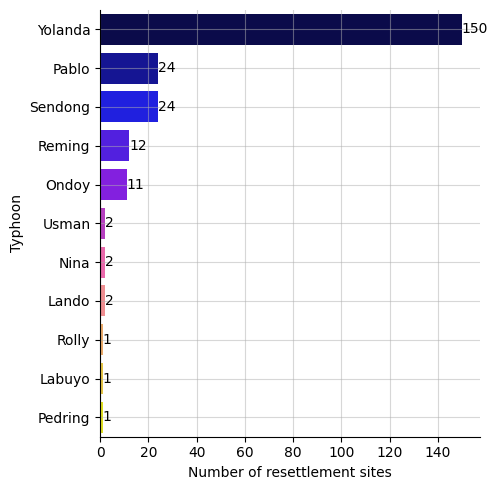

In [ ]:
# plt.figure(figsize = (15,3), dpi = 150)

g = sns.catplot(y = 'Typhoon', data = df, kind='count',
                palette = 'gnuplot2', order = df['Typhoon'].value_counts().index)
plt.grid(alpha = 0.5)

ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_width()):1.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xlabel('Number of resettlement sites')
plt.show()

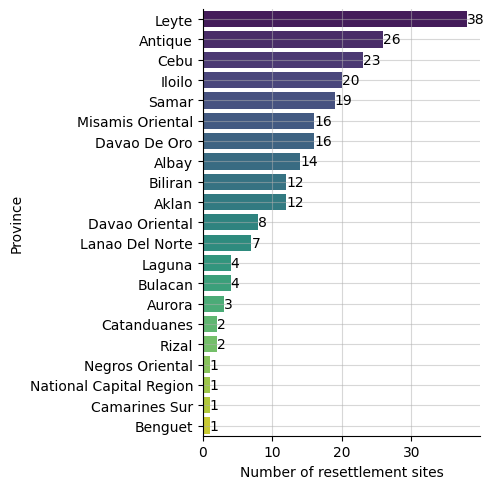

In [ ]:
g = sns.catplot(y = 'Province', data = df, kind='count',
                palette = 'viridis', order = df['Province'].value_counts().index)
plt.grid(alpha = 0.5)

ax = g.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_width()):1.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xlabel('Number of resettlement sites')
plt.show()

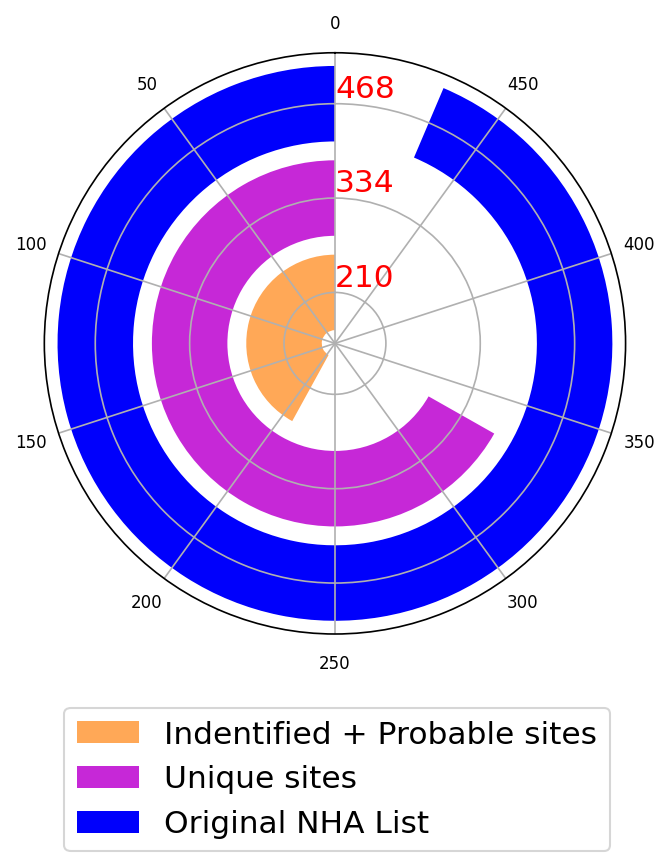

In [ ]:
plot_size = 5

pal = list(sns.color_palette(palette='gnuplot2_r', n_colors=3).as_hex())
plt.figure(dpi = 150, facecolor = None)



plt.gcf().set_size_inches(plot_size, plot_size*1.5)
ax = plt.subplot(projection='polar')
# input_df.reset_index(inplace=True, drop=True)
numbers = [210, 334, 468]
list_details = ['Indentified + Probable sites', 'Unique sites', 'Original NHA List']

ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_thetagrids(np.arange(0,360,36), labels=(np.arange(0,360,36)*50/36).astype(int), fontsize = 8)

for i in range(3):
    ax.barh(i, numbers[i]*2*np.pi/500, label=list_details[i], color=pal[i])

plt.legend(loc = 0, fontsize=15, bbox_to_anchor=(1, -0.1))

ax.set_rgrids(range(3), labels = numbers, fontsize = 15, color = 'r')
ax = plt.subplot(projection='polar')


# plt.title(column_name + ": " + str(category))
# plt.tight_layout()
# plt.savefig(results + str(category) + ".png")
# plt.show()

## MapViewer

In [ ]:
reg_names =  ['NCR',
              'CAR',
              'Region I',
              'Region II',
              'Region III',
              'Region IV-A',
              'Region IV-B',
              'Region V',
              'Region VI',
              'Region VII',
              'Region VIII',
              'Region IX',
              'Region X',
              'Region XI',
              'Region XII',
              'Region XIII',
              'ARMM']
reg_codes =  [2355, 2354, 2356, 2357,
              67165, 67166, 67167,
              2361, 2362, 2363, 2364,
              67159, 67160, 67161, 67162,
              2368, 67156]

# Regional NTL

In [ ]:
# viirs_ph = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").select('avg_rad')
# reg_geoms = ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.inList('ADM1_CODE', reg_codes))

# # function to reduce our collection of geometries'
# def get_reg_avg_rad(img):
#     return img.reduceRegions(reducer=ee.Reducer.mean(), collection=reg_geoms, scale=500)

# # function to get individual image dates
# def get_date(img):
#     return img.set('date', img.date().format())

# # map these functions to our image collection
# reduced_regions = viirs_ph.map(get_reg_avg_rad).flatten()
# dates = viirs_ph.map(get_date)

# # get lists
# key_cols = ['ADM1_CODE','mean']

# regions_list = reduced_regions.reduceColumns(ee.Reducer.toList(len(key_cols)), key_cols).values()
# dates_list = dates.reduceColumns(ee.Reducer.toList(1), ['date']).values()

# # some numpy maneuvers to structure our data
# df_ph = pd.DataFrame(np.asarray(regions_list.getInfo()).squeeze(), columns=key_cols)
# dates = np.asarray(dates_list.getInfo()).squeeze()

In [ ]:
# for regions in tqdm(reg_codes, 'Processing Regional Extraction:'):
#     df_ph.loc[df_ph['ADM1_CODE']==regions,'dates'] = dates

# df_ph['dates'] = pd.to_datetime(df_ph['dates'])
# df_ph.set_index('dates', inplace=True)

# df_ph['mean'] = df_ph['mean'].astype(float)

# df_ph

# Resettlement NTL Extraction

## `NTL_dataset_initialize(Province, Region)`

In [ ]:
def NTL_dataset_initialize(Province, Region):

  viirs = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filter(ee.Filter.date('2014-01-01', '2023-12-01'))
  province = ee.Feature(ee.FeatureCollection("FAO/GAUL/2015/level2").filter(ee.Filter.eq('ADM2_NAME', Province)).first()).geometry()
  region = ee.Feature(ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.eq('ADM1_CODE', Region)).first()).geometry()

  def get_prov_mean(img):
      img = img.updateMask(img.gte(0))
      mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=province, scale=500, maxPixels=1e9).get('avg_rad')
      return img.set('date', img.date().format()).set('mean',mean)

  def get_reg_mean(img):
      img = img.updateMask(img.gte(0))
      mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=region, scale=500, maxPixels=1e9).get('avg_rad')
      return img.set('date', img.date().format()).set('mean',mean)

  # reduce collection
  prov_mean = viirs.map(get_prov_mean)
  reg_mean = viirs.map(get_reg_mean)

  # get lists
  nested_list = prov_mean.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
  nested_list_2 = reg_mean.reduceColumns(ee.Reducer.toList(1), ['mean']).values().get(0)
  regional_NTL = np.asarray(nested_list_2.getInfo()).squeeze()

  # convert to dataframe
  NTL_dataset = pd.DataFrame(nested_list.getInfo(), columns=['date', str(Province) + ' Province'])
  NTL_dataset['date'] = pd.to_datetime(NTL_dataset['date'])
  NTL_dataset = NTL_dataset.set_index('date')
  NTL_dataset.insert(1, str(reg_names[reg_codes.index(Region)]), regional_NTL)

  # plt.plot(NTL_dataset)
  # plt.show()
  return NTL_dataset

# NTL_dataset_initialize('Leyte',2364)

NTL_dataset = NTL_dataset_initialize('Leyte',2364)
NTL_dataset

In [ ]:
# def NTL_dataset_initialize(Province, Region):

#   viirs = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG').filter(ee.Filter.date('2014-01-01', '2023-12-01'))
#   province = ee.Feature(ee.FeatureCollection("FAO/GAUL/2015/level2").filter(ee.Filter.eq('ADM2_NAME', Province)).first()).geometry()
#   region = ee.Feature(ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.eq('ADM1_CODE', Region)).first()).geometry()

#   def get_prov_mean(img):
#       # img = img.updateMask(img.gte(0))
#       mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=province, scale=500, maxPixels=1e9).get('avg_rad')
#       return img.set('date', img.date().format()).set('mean',mean)

#   def get_reg_mean(img):
#       # img = img.updateMask(img.gte(0))
#       mean = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=region, scale=500, maxPixels=1e9).get('avg_rad')
#       return img.set('date', img.date().format()).set('mean',mean)

#   # reduce collection
#   prov_mean = viirs.map(get_prov_mean)
#   reg_mean = viirs.map(get_reg_mean)

#   # get lists
#   nested_list = prov_mean.reduceColumns(ee.Reducer.toList(2), ['date','mean']).values().get(0)
#   nested_list_2 = reg_mean.reduceColumns(ee.Reducer.toList(1), ['mean']).values().get(0)
#   regional_NTL = np.asarray(nested_list_2.getInfo()).squeeze()

#   # convert to dataframe
#   NTL_dataset = pd.DataFrame(nested_list.getInfo(), columns=['date', str(Province) + ' Province'])
#   NTL_dataset['date'] = pd.to_datetime(NTL_dataset['date'])
#   NTL_dataset = NTL_dataset.set_index('date')
#   NTL_dataset.insert(1, str(reg_names[reg_codes.index(Region)]), regional_NTL)

#   plt.plot(NTL_dataset)
#   plt.show()
#   return NTL_dataset


Leyte Province  Region VIII
date                                   
2014-01-01        0.101630     0.087372
2014-02-01        0.170149     0.114812
2014-03-01        0.138900     0.098264
2014-04-01        0.217183     0.181112
2014-05-01        0.172025     0.111598
...                    ...          ...
2023-05-01        0.701959     0.529153
2023-06-01        0.618948     0.461296
2023-07-01        0.148886     0.147419
2023-08-01        0.458526     0.387465
2023-09-01        0.587854     0.433991

[117 rows x 2 columns]

In [ ]:
print(NTL_dataset.index)

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01',
               ...
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01'],
              dtype='datetime64[ns]', name='date', length=117, freq=None)


## `STL_extraction(province, code, period)`

In [ ]:
def STL_extraction(province, code, period):

    region = str(reg_names[reg_codes.index(code)])

    print("Processing NTL extraction for resettlements in " + str(province) + " Province, " + str(region))
    NTL_dataset = NTL_dataset_initialize(province, code)

    prov_df = df.loc[df['Province']==province,:]
    prov_df = prov_df.reset_index(drop=True)
    prov_df.index = prov_df.index + 1


    for i in tqdm(range(1,len(prov_df)+1), desc = region + ": Processing"):
      NTL_data = time_series_(prov_df['Latitude'][i], prov_df['Longitude'][i], prov_df['Buffer'][i])
      NTL_data.index = pd.to_datetime(NTL_data.index)
      idx = pd.date_range(start="2014-01-01",end="2023-09-01", freq='MS')
      NTL_data = NTL_data.reindex(idx)
      NTL_data = NTL_data.interpolate(limit_direction='both')
      NTL_dataset.insert(i+1, prov_df['Project Name'][i], NTL_data)

    trend = NTL_dataset.copy()
    seasonality = NTL_dataset.copy()
    residual = NTL_dataset.copy()

    for loc in tqdm(NTL_dataset.columns, desc = 'STL Decomposition'):
      data = NTL_dataset[loc].values
      decomposition = sm.tsa.seasonal_decompose(data, model='additive', period = period)
      trend[loc] = decomposition.trend
      seasonality[loc] = decomposition.seasonal
      residual[loc] = decomposition.resid

    dataframe = pd.concat([NTL_dataset,trend, seasonality, residual], axis = 1, keys = ['Raw', 'Trend', 'Seasonality', 'Residual'])
    return dataframe

# STL_extraction(province = 'Laguna', code = 67166, period = 12)

# Sample Runs (for Debugging)

In [ ]:
dataframe = STL_extraction(province = 'Leyte', code = 2364, period = 12)

dataframe

Processing NTL extraction for resettlements in Leyte Province, Region VIII


STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 766.40it/s]


Raw                                        \
           Leyte Province Region VIII Kawayan Ville Villa Diana   
date                                                              
2014-01-01       0.101630    0.087372      0.262384    0.225237   
2014-02-01       0.170149    0.114812      0.111189    0.107876   
2014-03-01       0.138900    0.098264      0.059881    0.080907   
2014-04-01       0.217183    0.181112      0.090566    0.053938   
2014-05-01       0.172025    0.111598      0.121251    0.026969   
...                   ...         ...           ...         ...   
2023-05-01       0.701959    0.529153      0.648243    0.811948   
2023-06-01       0.618948    0.461296      0.000000    0.000000   
2023-07-01       0.148886    0.147419      1.413277    1.359351   
2023-08-01       0.458526    0.387465      0.387297    0.435325   
2023-09-01       0.587854    0.433991      0.370541    0.110000   

                                                                     \
           Ridge View Park New Hope Village Knightsridge Residences   
date                                                                  
2014-01-01        0.240081         0.259939                0.250861   
2014-02-01        0.143410         0.163447                0.108903   
2014-03-01        0.007060         0.065777                0.054506   
2014-04-01        0.099713         0.043851                0.078866   
2014-05-01        0.047443         0.021926                0.066565   
...                    ...              ...                     ...   
2023-05-01        0.591814         0.431255                0.643906   
2023-06-01        0.000000         0.000000                0.000000   
2023-07-01        1.327103         1.486052                1.391000   
2023-08-01        0.426902         0.581734                0.462375   
2023-09-01        0.237657         0.380923                0.214219   

                                                             ...  \
           Villa Sofia North Hill Arbours Salvacion Heights  ...   
date                                                         ...   
2014-01-01    0.207366           0.278039          0.290849  ...   
2014-02-01    0.098870           0.126072          0.084186  ...   
2014-03-01    0.092130           0.044625          0.062283  ...   
2014-04-01    0.064774           0.029750          0.394358  ...   
2014-05-01    0.032387           0.014875          0.102708  ...   
...                ...                ...               ...  ...   
2023-05-01    0.574933           0.732504          0.581307  ...   
2023-06-01    0.000000           0.000000          0.000000  ...   
2023-07-01    1.296726           1.438504          1.409091  ...   
2023-08-01    0.452197           0.566908          0.407273  ...   
2023-09-01    0.328789           0.330571          0.257216  ...   

                Residual                                           \
           Villa Soledad Virlyn Heights Subdivision Tabango Ville   
date                                                                
2014-01-01           NaN                        NaN           NaN   
2014-02-01           NaN                        NaN           NaN   
2014-03-01           NaN                        NaN           NaN   
2014-04-01           NaN                        NaN           NaN   
2014-05-01           NaN                        NaN           NaN   
...                  ...                        ...           ...   
2023-05-01           NaN                        NaN           NaN   
2023-06-01           NaN                        NaN           NaN   
2023-07-01           NaN                        NaN           NaN   
2023-08-01           NaN                        NaN           NaN   
2023-09-01           NaN                        NaN           NaN   

                                                                             \
           Dulag Town Ville Barugo Town Ville  Villa Verde Capoocan Village   
date      

In [ ]:
province = 'Leyte'

prov_df = df.loc[df['Province']==province,:]
prov_df = prov_df.reset_index(drop=True)
prov_df.index = prov_df.index + 1
prov_df

0   index  Typhoon Province                      Project Name  \
1      24  Yolanda    Leyte                     Kawayan Ville   
2      25  Yolanda    Leyte                       Villa Diana   
3      26  Yolanda    Leyte                   Ridge View Park   
4      27  Yolanda    Leyte                  New Hope Village   
5      28  Yolanda    Leyte           Knightsridge Residences   
6      29  Yolanda    Leyte                       Villa Sofia   
7      30  Yolanda    Leyte                North Hill Arbours   
8      31  Yolanda    Leyte                 Salvacion Heights   
9      32  Yolanda    Leyte                 Guadalupe Heights   
10     33  Yolanda    Leyte               St. Francis Village   
11     34  Yolanda    Leyte              Pope Francis Village   
12     35  Yolanda    Leyte       Kapuso Village Project Palo   
13     36  Yolanda    Leyte               Ver Dominic Heights   
14     37  Yolanda    Leyte                Prime Town Phase 1   
15     38  Yolanda    Leyte                Prime Town Phase 3   
16     39  Yolanda    Leyte                Channel Ridge View   
17     40  Yolanda    Leyte                    Pastrana Ville   
18     41  Yolanda    Leyte          Carigara Housing Project   
19     42  Yolanda    Leyte        Carigara Housing Project 1   
20     43  Yolanda    Leyte                          Ecoville   
21     44  Yolanda    Leyte  Vergabriel's Heights Subdivision   
22     45  Yolanda    Leyte               Mayorga Towne Homes   
23     46  Yolanda    Leyte                     Paglaum Ville   
24     47  Yolanda    Leyte               Mont Eagle Ville IV   
25     48  Yolanda    Leyte             Tolosa Haiyan Village   
26     49  Yolanda    Leyte                   Matlang Heights   
27     50  Yolanda    Leyte         Coconut Grove Subdivision   
28     51  Yolanda    Leyte        Bagong Pag-Asa Subdivision   
29     52  Yolanda    Leyte                     Villa Soledad   
30     53  Yolanda    Leyte        Virlyn Heights Subdivision   
31     54  Yolanda    Leyte                     Tabango Ville   
32     55  Yolanda    Leyte                  Dulag Town Ville   
33     56  Yolanda    Leyte                Barugo Town Ville    
34     57  Yolanda    Leyte                       Villa Verde   
35     58  Yolanda    Leyte                  Capoocan Village   
36     59  Yolanda    Leyte                 Dagami Town Ville   
37     60  Yolanda    Leyte            Sta. Fe Village Site 1   
38     61  Yolanda    Leyte            Cool Spring Residences   

0                                            Location   Latitude   Longitude  \
1                        Brgy, Kawayan, Tacloban City  11.323226  124.954521   
2             Brgy. New Kawayan, Tacloban City, Leyte  11.331256  124.953063   
3               Brgy. Cabalawan, Tacloban City, Leyte  11.301019  124.952880   
4   Brgy. New Kawayan & Brgy. Sta. Elena, Tacloban...  11.341332  124.944084   
5              Brgy. Camansihay, Tacloban City, Leyte  11.304363  124.940941   
6                 Brgy. Tagpuro, Tacloban City, Leyte  11.343973  124.966135   
7               Brgy. Sto. Niño (Suhi), Tacloban City  11.323519  124.947365   
8      Brgy. Salvacion (Tigbao), Tacloban City, Leyte  11.226967  124.952686   
9       Brgy. San Isidro (Suhi), Tacloban City, Leyte  11.318076  124.944458   
10                          Brgy. Suhi, Tacloban City  11.319448  124.956916   
11                      Brgy. 99, Diit, Tacloban City  11.260468  124.961335   
12                        Brgy. San Jose, Palo, Leyte  11.173572  124.980725   
13                 Brgy. San Jose, Palo Site 1, Leyte  11.175870  124.984272   
14                         Brgy. Pago, Tanauan, Leyte  11.101975  125.001334   
15                        Brgy. Sacme, Tanauan, Leyte  11.070821  125.018836   
16                  Brgy. Poblacion, Babatngon, Leyte  11.419122  124.840478   
17                     Brgy. Aringit, Pastrana, Leyte  11.117005  124.882018   
18                    Br

In [ ]:
# code = 2364
# period = 12
# region = str(reg_names[reg_codes.index(code)])

# for i in tqdm(range(1,len(prov_df[:1])+1), desc = region + ": Processing"):
#       NTL_data = time_series_(prov_df['Latitude'][i], prov_df['Longitude'][i], prov_df['Buffer'][i])
#       NTL_data.index = pd.to_datetime(NTL_data.index)
#       idx = pd.date_range(start="2014-01-01",end="2023-09-01", freq='MS')
#       NTL_data = NTL_data.reindex(idx)
# NTL_data

In [ ]:
# NTL_data.index = pd.to_datetime(NTL_data.index)

In [ ]:
# print(pd.date_range(start="2014-01-01",end="2023-09-01", freq='MS').difference(NTL_data.index))

Processing: 100%|██████████| 38/38 [00:06<00:00,  6.22it/s]


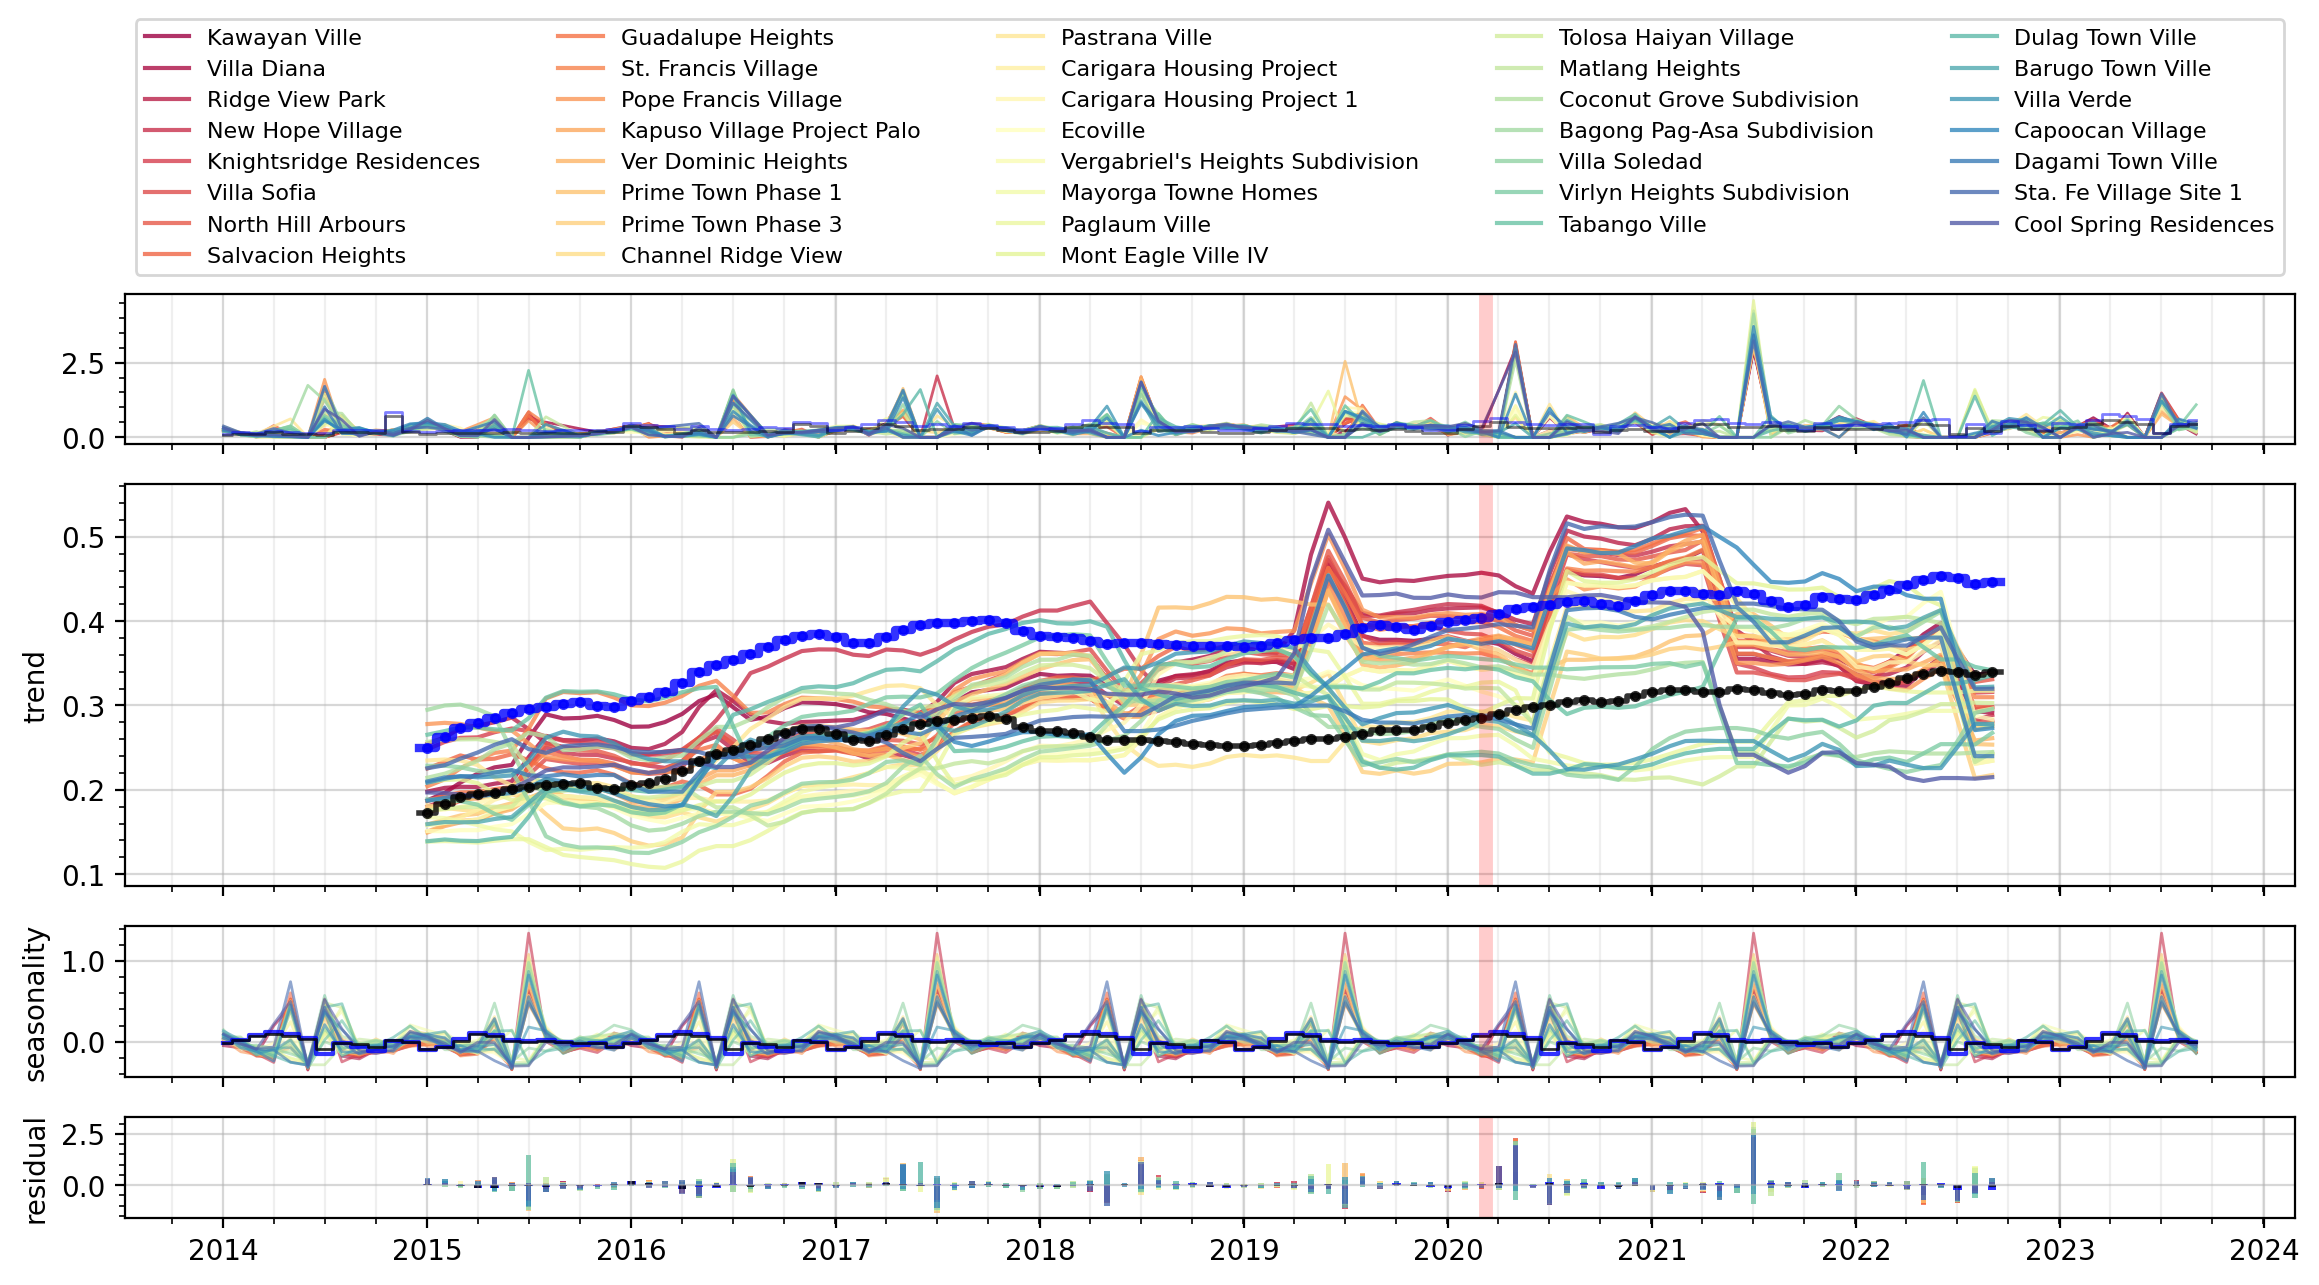

In [ ]:
province = 'Leyte'
code = 2364
period = 12
region = str(reg_names[reg_codes.index(code)])

# fig, ax = plt.subplots(nrows=4,ncols=1, sharex='col',
#                   gridspec_kw={'height_ratios':[0.75,1,0.5,0.5]},
#                   figsize=(10,5), dpi = 200)

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

fig, ax = plt.subplots(nrows=4,ncols=1, sharex='col',
                      gridspec_kw={'height_ratios':[0.75,2,0.75,0.5]},
                      figsize=(14,6), dpi = 200)


# matplotlib.rcParams['axes.edgecolor'] = 'white'
# plt.style.context('dark_background')
# plt.style.use('dark_background')
# plt.rcParams.update({
#     "lines.color": "white",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "white",
#     "xtick.color": "white",
#     "ytick.color": "white",
#     "grid.color": "lightgray",
#     "figure.facecolor": "black",
#     "figure.edgecolor": "black",
#     "savefig.facecolor": "black",
#     "savefig.edgecolor": "black"})

# fig.patch.set_facecolor('white')
# fig.patch.set_alpha(0)
# ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
# ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
# ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
# ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black


date = dataframe.index
trend = dataframe['Trend']
seasonality = dataframe['Seasonality']
residual = dataframe['Residual']

prov_df = df.loc[df['Province']==province,:]

for i in tqdm(range(len(prov_df)), desc = 'Processing: '):

  data = dataframe['Raw'].iloc[:,i+2].values
  line_color = plt.cm.Spectral(i/len(prov_df))

  ax[0].plot(date, data, color = line_color, linewidth = 1, alpha = 0.8)
  ax[0].set_ylabel('$nW ·cm^{−2}·sr^{−1}$', color = 'white')

  ax[1].plot(date, trend.iloc[:,i+2], color = line_color,
            alpha = 0.8, label= dataframe['Raw'].columns[i+2])
  ax[1].set_ylabel('trend')

  ax[2].plot(date, seasonality.iloc[:,i+2], color = line_color,
            linewidth = 1, alpha = 0.6)
  ax[2].set_ylabel('seasonality')

  resid = residual.iloc[:,i+2]
  ax[3].bar(date, resid, width = 10, color = line_color, alpha = 0.8)
  ax[3].set_ylabel('residual')


ax[1].legend(fontsize=8, ncol = 5, bbox_to_anchor= (0, 1.05, 1, 0.5), loc="lower left",
            bbox_transform=ax[0].transAxes, fancybox = True, mode='expand')

ax[0].plot(dataframe['Raw'].iloc[:,0], 'b-', drawstyle = 'steps-mid',  linewidth = 1, alpha = 0.5)
ax[0].plot(dataframe['Raw'].iloc[:,1], 'k-', drawstyle = 'steps-mid', linewidth = 1, alpha = 0.5)
ax[1].plot(trend.iloc[:,0], 'b.-', drawstyle = 'steps-mid', label= str(province) + ' Province',  linewidth = 3, alpha = 0.8)
ax[1].plot(trend.iloc[:,1], 'k.-', drawstyle = 'steps-mid', label= str(region), linewidth = 2, alpha = 0.8)
ax[2].plot(seasonality.iloc[:,0], 'b-', drawstyle = 'steps-mid',  linewidth = 1.5, alpha = 0.8)
ax[2].plot(seasonality.iloc[:,1], 'k-', drawstyle = 'steps-mid', linewidth = 1, alpha = 0.8)
ax[3].bar(date, residual.iloc[:,0], color = 'b',  width = 15, alpha = 0.8)
ax[3].bar(date, residual.iloc[:,1], color = 'k', width = 12,  alpha = 0.8)

for ax in ax:
  ax.grid(alpha = 0.5)
  ax.axvline(datetime.date(2020, 3, 10), color = 'r', lw = 5, alpha = 0.2) #For COVID lockdown
  ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')) # 2 decimal places)
  ax.minorticks_on()
  ax.xaxis.grid(True, which='minor', alpha = 0.2)


dtFmt = mdates.DateFormatter('%Y') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.tight_layout()
# plt.savefig(results+"/CH6-TS-"+str(province)+".png", bbox_inches="tight")
plt.show()

In [ ]:
dataframe.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01',
               ...
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01'],
              dtype='datetime64[ns]', name='date', length=117, freq=None)

In [ ]:
trend

Leyte Province  Region VIII  Kawayan Ville  Villa Diana  \
date                                                                  
2014-01-01             NaN          NaN            NaN          NaN   
2014-02-01             NaN          NaN            NaN          NaN   
2014-03-01             NaN          NaN            NaN          NaN   
2014-04-01             NaN          NaN            NaN          NaN   
2014-05-01             NaN          NaN            NaN          NaN   
...                    ...          ...            ...          ...   
2023-05-01             NaN          NaN            NaN          NaN   
2023-06-01             NaN          NaN            NaN          NaN   
2023-07-01             NaN          NaN            NaN          NaN   
2023-08-01             NaN          NaN            NaN          NaN   
2023-09-01             NaN          NaN            NaN          NaN   

            Ridge View Park  New Hope Village  Knightsridge Residences  \
date                                                                     
2014-01-01              NaN               NaN                      NaN   
2014-02-01              NaN               NaN                      NaN   
2014-03-01              NaN               NaN                      NaN   
2014-04-01              NaN               NaN                      NaN   
2014-05-01              NaN               NaN                      NaN   
...                     ...               ...                      ...   
2023-05-01              NaN               NaN                      NaN   
2023-06-01              NaN               NaN                      NaN   
2023-07-01              NaN               NaN                      NaN   
2023-08-01              NaN               NaN                      NaN   
2023-09-01              NaN               NaN                      NaN   

            Villa Sofia  North Hill Arbours  Salvacion Heights  ...  \
date                                                            ...   
2014-01-01          NaN                 NaN                NaN  ...   
2014-02-01          NaN                 NaN                NaN  ...   
2014-03-01          NaN                 NaN                NaN  ...   
2014-04-01          NaN                 NaN                NaN  ...   
2014-05-01          NaN                 NaN                NaN  ...   
...                 ...                 ...                ...  ...   
2023-05-01          NaN                 NaN                NaN  ...   
2023-06-01          NaN                 NaN                NaN  ...   
2023-07-01          NaN                 NaN                NaN  ...   
2023-08-01          NaN                 NaN                NaN  ...   
2023-09-01          NaN                 NaN                NaN  ...   

            Villa Soledad  Virlyn Heights Subdivision  Tabango Ville  \
date                                                                   
2014-01-01            NaN                         NaN            NaN   
2014-02-01            NaN                         NaN            NaN   
2014-03-01            NaN                         NaN            NaN   
2014-04-01            NaN                         NaN            NaN   
2014-05-01            NaN                         NaN            NaN   
...                   ...                         ...            ...   
2023-05-01            NaN                         NaN            NaN   
2023-06-01            NaN                         NaN            NaN   
2023-07-01            NaN                         NaN            NaN   
2023-08-01            NaN                         NaN            NaN   
2023-09-01            NaN                         NaN            NaN   

            Dulag Town Ville  Barugo Town Ville   Villa Verde  \
date                                                            
2014-01-01               NaN                 NaN          NaN   
2014-02-01               NaN                 NaN          NaN   
2014

In [ ]:
# y = trend['Leyte Province'].dropna().values
y = trend.dropna().values
x = np.arange(len(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

slope, intercept, r_value, p_value, std_err

fig, ax = plt.subplots(nrows=2,ncols=1,
                       sharex='col', gridspec_kw={'height_ratios':[0.75,0.25]},
                       figsize=(15,6), dpi = 200)

ax[0].grid(alpha = 0.3)
# ax.plot(dataframe['Raw'].iloc[:,0]-0.01, 'k.-', drawstyle = 'steps-mid',  linewidth = 2)
ax[0].plot(dataframe['Raw'].iloc[:,0], 'k.-', drawstyle = 'steps-mid',  linewidth = 1, label = 'NTL average radiance ($y_t$)', alpha = 0.5)
trend = dataframe['Trend'].iloc[:,0]
ax[0].plot(trend, 'b.-', alpha = 1, ms = 15, lw = 5, label = 'NTL Trend ($T_t$)')

ax[0].plot(dataframe.index[6:-6], intercept + slope*x, 'r--', label = 'Best Fit Line on NTL Trend (ROC)', lw = 10, alpha = 0.8)


# ax[0].plot([date[6], date[-7]], [trend[6], trend[-7]], 'k--', label = 'Rate of Change', lw = 3)
# ax[0].plot([date[6], date[-7]], [trend[6], trend[-7]], 'yo')
# ax[0].legend(fontsize=7, ncol = 5, bbox_to_anchor= (0, 1.0, 1, 0.5), loc="lower left",
#             bbox_transform=ax[0].transAxes, fancybox = True, mode='expand')

ax[0].legend(title = 'Leyte Province',fancybox = True)

ax[0].annotate('net change: +'+ str(np.round(slope*107, 3)), xy = (date[84],0.04), xytext=(date[84], 0.04))
ax[0].annotate('slope: +'+ str(np.round(slope*12, 3)) + ' per year', xy = (date[84],0.0), xytext=(date[84], 0.0))
ax[0].annotate('intercept: '+ str(np.round(intercept, 3)), xy = (date[84],-0.04), xytext=(date[84], -0.04))
ax[0].annotate('r-value: ' + str(np.round(r_value, 5)), xy = (date[84],-0.08), xytext=(date[84], -0.08))
ax[0].set_ylabel('$nW ·cm^{−2}·sr^{−1}$')

ax[1].grid(alpha = 0.3)
ax[1].plot(dataframe['Seasonality'].iloc[:,0], color = 'g',
           ls = '-', drawstyle = 'steps-mid', alpha = 0.75, lw = 5, label = 'NTL Seasonality ($S_t$)')
ax[1].bar(date, dataframe['Residual'].iloc[:,0], width = 20, color = 'orange',
          alpha = 1, label = 'Residual ($E_t$)')
# ax[1].set_xticks([date[0], date[27], date[54], date[-28], date[-1]])
ax[1].legend(ncol = 2, fancybox = True)
ax[1].set_ylabel('$nW ·cm^{−2}·sr^{−1}$')

dtFmt = mdates.DateFormatter('%Y') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
plt.tight_layout()

ValueError: ignored

# NTL plotter

In [ ]:
def timeseries_resettlements(province, code, period):

    region = str(reg_names[reg_codes.index(code)])

    print("Processing NTL extraction for resettlements in " + str(province) + " Province, " + str(region))
    NTL_dataset = NTL_dataset_initialize(province, code)
    prov_df = df.loc[df['Province']==province,:]
    prov_df = prov_df.reset_index(drop=True)
    prov_df.index = prov_df.index + 1

    for i in tqdm(range(1,len(prov_df)+1), desc = region + ": Processing"):
      # NTL_data = time_series_(prov_df['Latitude'][i], prov_df['Longitude'][i], prov_df['Buffer'][i])
      # NTL_dataset.insert(i+1, prov_df['Project Name'][i], NTL_data)
      NTL_data = time_series_(prov_df['Latitude'][i], prov_df['Longitude'][i], prov_df['Buffer'][i])
      NTL_data.index = pd.to_datetime(NTL_data.index)
      idx = pd.date_range(start="2014-01-01",end="2023-09-01", freq='MS')
      NTL_data = NTL_data.reindex(idx)
      NTL_data = NTL_data.interpolate(limit_direction='both')
      NTL_dataset.insert(i+1, prov_df['Project Name'][i], NTL_data)


    trend = NTL_dataset.copy()
    seasonality = NTL_dataset.copy()
    residual = NTL_dataset.copy()

    for loc in tqdm(NTL_dataset.columns, desc = 'STL Decomposition'):
      data = NTL_dataset[loc].values
      decomposition = sm.tsa.seasonal_decompose(data, model='additive', period = period)
      trend[loc] = decomposition.trend
      seasonality[loc] = decomposition.seasonal
      residual[loc] = decomposition.resid

    print("Plotting timeseries NTL data")

    fig, ax = plt.subplots(nrows=4,ncols=1, sharex='col',
                      gridspec_kw={'height_ratios':[0.75,2,0.75,0.5]},
                      figsize=(15,5), dpi = 200)

    date = NTL_dataset.index

    NTL_dataset.copy()

    ax[0].plot(NTL_dataset.iloc[:,0], 'b.-', drawstyle = 'steps-mid',  linewidth = 3, alpha = 0.5)
    ax[0].plot(NTL_dataset.iloc[:,1], 'k.-', drawstyle = 'steps-mid', linewidth = 2, alpha = 0.5)

    ax[1].plot(trend.iloc[:,0], 'b.-', drawstyle = 'steps-mid', label= str(province) + ' Province',  linewidth = 3, alpha = 0.8)
    ax[1].plot(trend.iloc[:,1], 'k.-', drawstyle = 'steps-mid', label= str(region), linewidth = 2, alpha = 0.8)
    ax[2].plot(seasonality.iloc[:,0], 'b-', drawstyle = 'steps-mid',  linewidth = 1.5, alpha = 0.8)
    ax[2].plot(seasonality.iloc[:,1], 'k-', drawstyle = 'steps-mid', linewidth = 1, alpha = 0.8)
    ax[3].bar(date, residual.iloc[:,0], color = 'b',  width = 15, alpha = 0.8)
    ax[3].bar(date, residual.iloc[:,1], color = 'k', width = 12,  alpha = 0.8)

    for i in tqdm(range(len(prov_df)), desc = 'Processing: '):

      data = NTL_dataset.iloc[:,i+2].values
      line_color = plt.cm.Spectral(i/len(prov_df))

      ax[0].plot(date, data, color = line_color, linewidth = 1, alpha = 0.8)
      ax[0].set_ylabel('$nW ·cm^{−2}·sr^{−1}$')

      ax[1].plot(date, trend.iloc[:,i+2], color = line_color,
                linewidth = prov_df['Buffer'][i+1]/100, alpha = 0.8, label= NTL_dataset.columns[i+2])
      ax[1].set_ylabel('trend')

      ax[2].plot(date, seasonality.iloc[:,i+2], color = line_color,
                linewidth = 1, alpha = 0.6)
      ax[2].set_ylabel('seasonality')

      resid = residual.iloc[:,i+2]
      ax[3].bar(date, resid, width = 10, color = line_color, alpha = 0.8)
      ax[3].set_ylabel('residual')


    ax[1].legend(fontsize=8, ncol = 5, bbox_to_anchor= (0, 1.05, 1, 0.5), loc="lower left",
                bbox_transform=ax[0].transAxes, fancybox = True, mode='expand')

    for ax in ax:
      ax.grid(alpha = 0.5)
      ax.axvline(datetime.date(2020, 3, 10), color = 'r', lw = 5, alpha = 0.2) #For COVID lockdown
      ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')) # 2 decimal places)
      ax.minorticks_on()
      ax.xaxis.grid(True, which='minor', alpha = 0.2)



    dtFmt = mdates.DateFormatter('%b-%Y') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
    # plt.tight_layout()
    # plt.savefig(results+"/CH6-TS-"+str(province)+".png", bbox_inches="tight")
    plt.show()

    return NTL_dataset, trend, seasonality, residual

Processing NTL extraction for resettlements in Leyte Province, Region VIII


STL Decomposition: 100%|██████████| 40/40 [00:00<00:00, 468.62it/s]


Plotting timeseries NTL data


Processing: 100%|██████████| 38/38 [00:08<00:00,  4.68it/s]


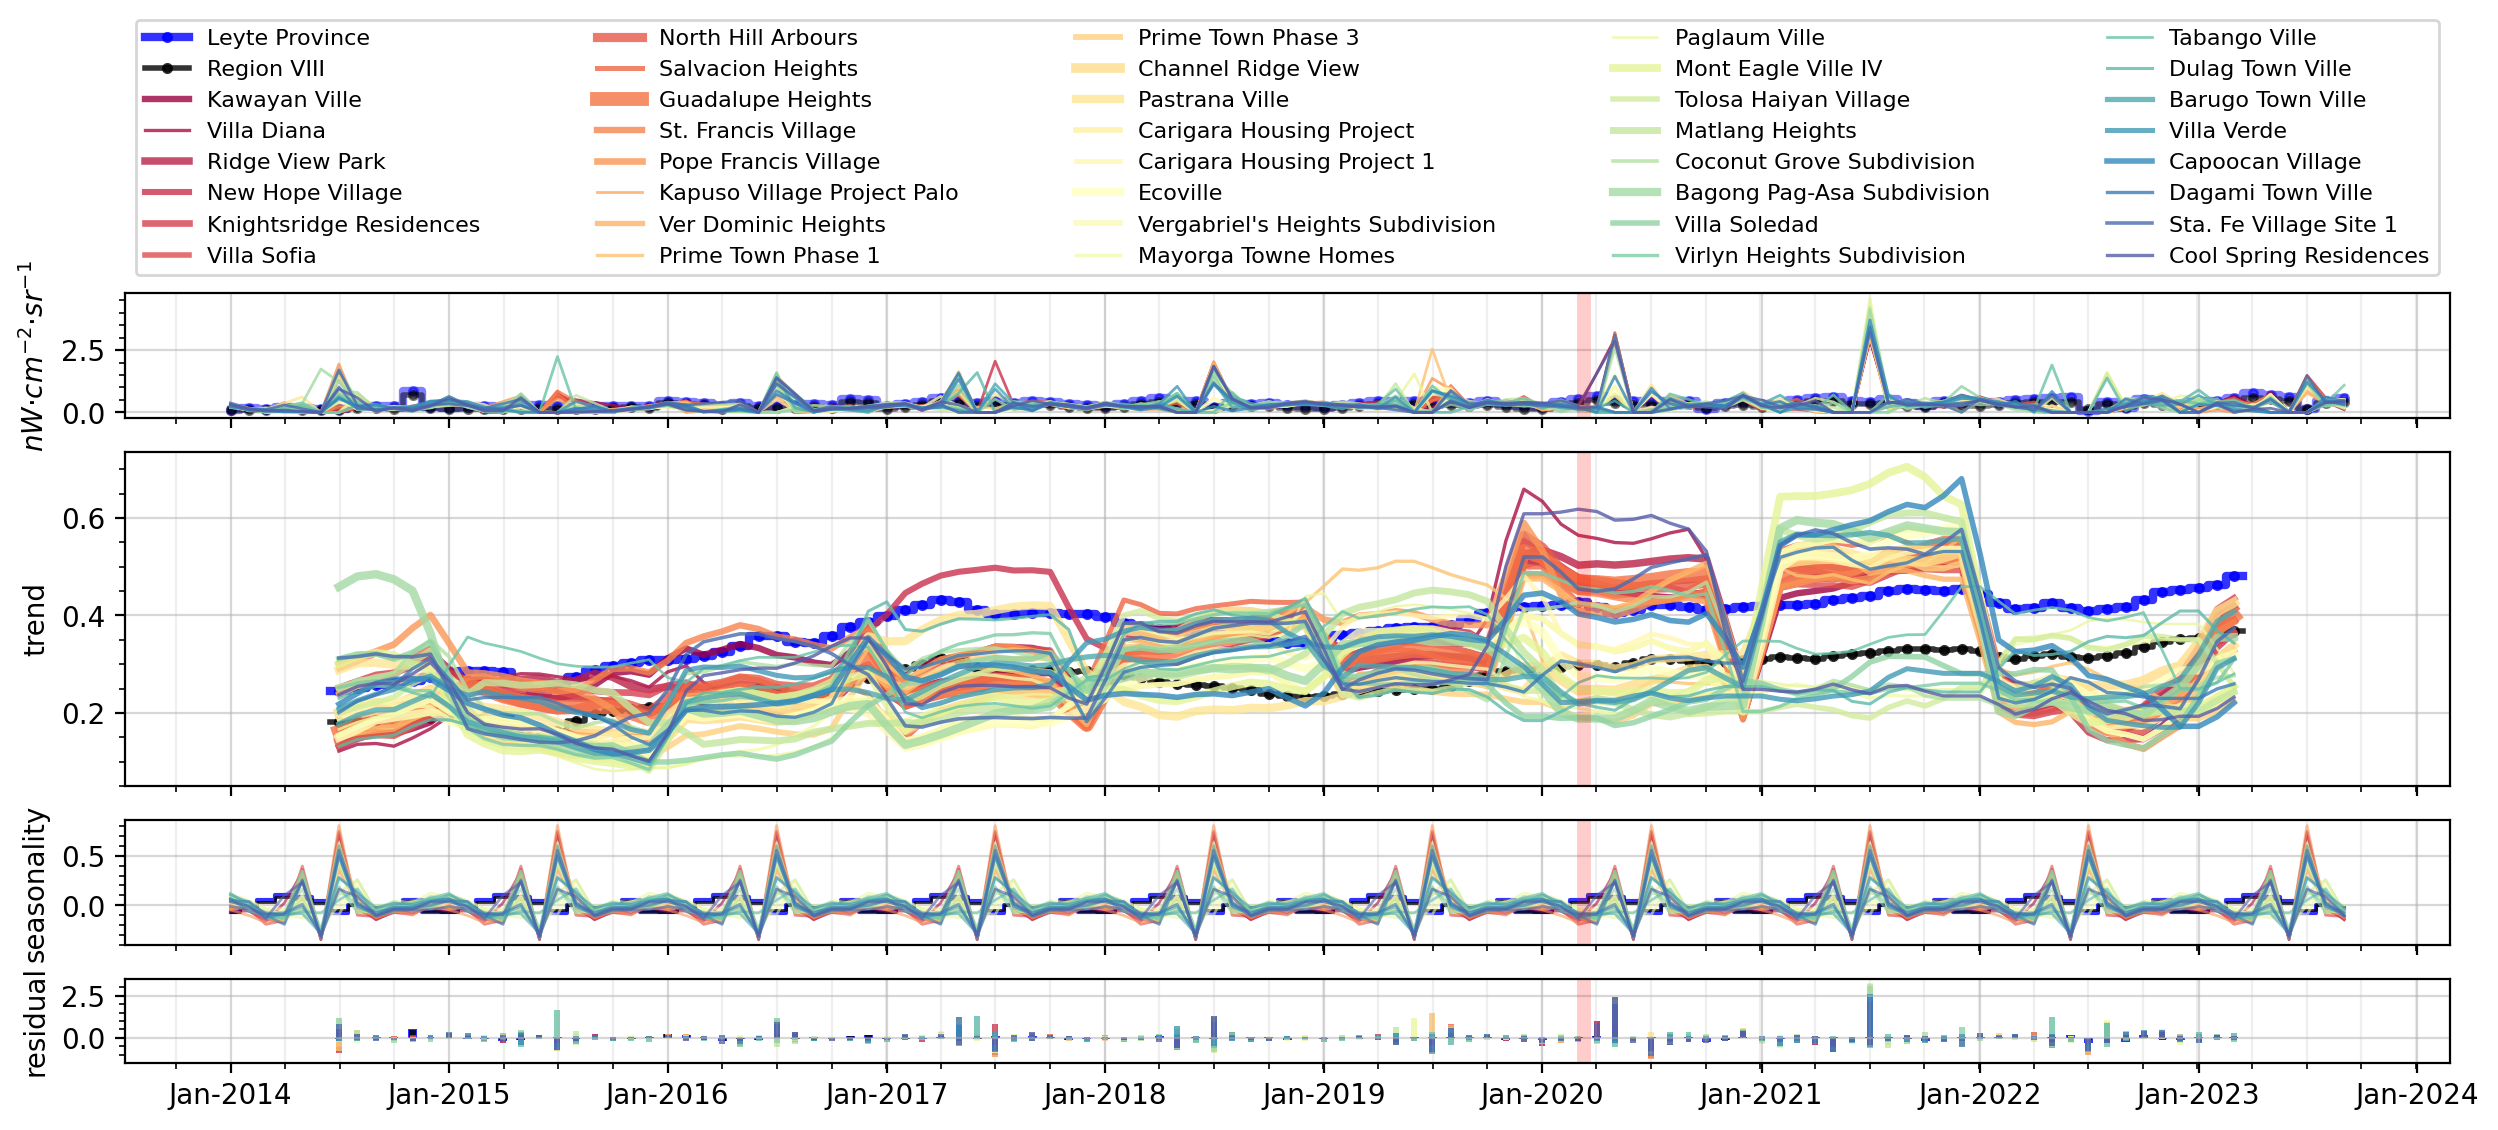

In [ ]:
NTL_dataset, trend, seasonality, residual = timeseries_resettlements(province = 'Leyte', code = 2364, period = 12)

100%|██████████| 40/40 [00:00<00:00, 614.07it/s]


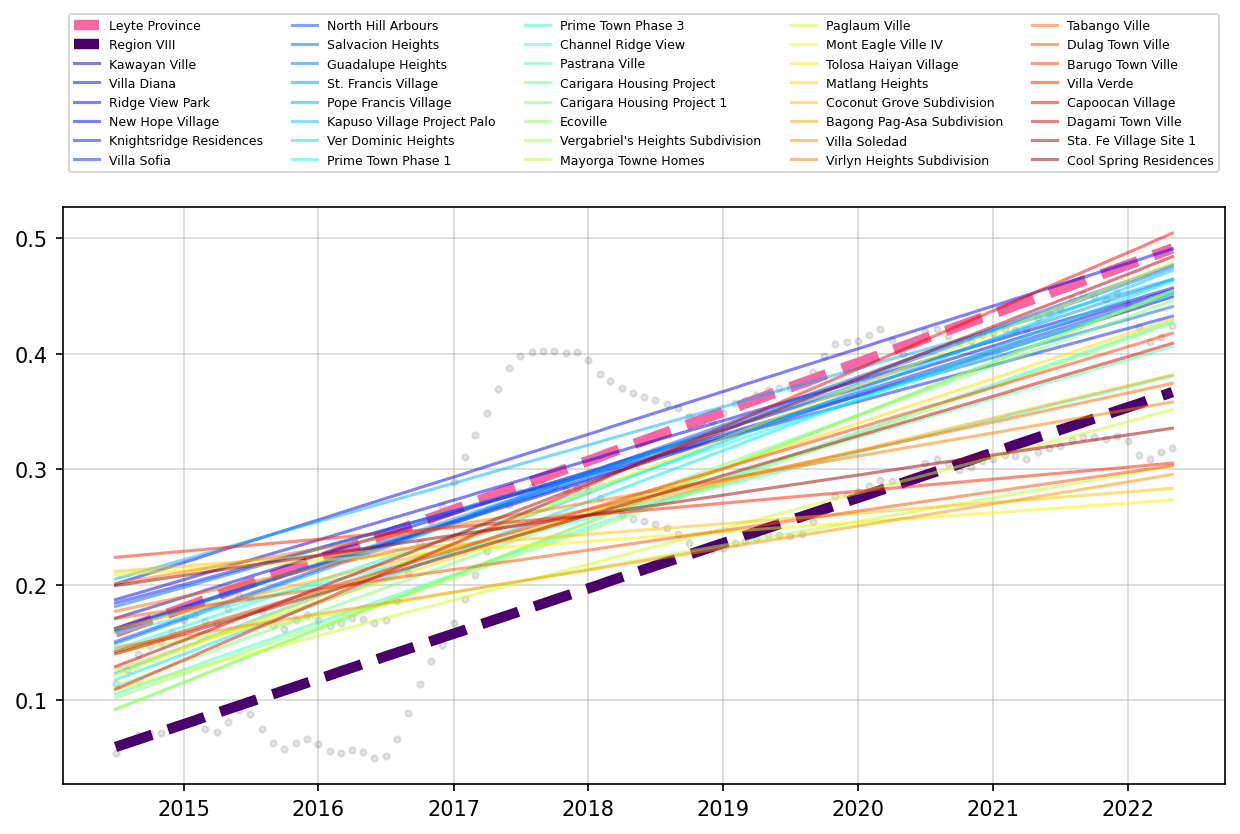

In [ ]:
dataset = dataframe['Trend'].dropna()

stats_summary = pd.DataFrame(index = dataset.columns,
                             columns = ['slope', 'intercept', 'r', 'p', 'std'])

plt.figure(dpi = 150, figsize = (10,5))
plt.grid(alpha = 0.5)

for i in tqdm(range(len(dataset.columns))):
  loc = dataset.columns[i]
  y = dataset[loc]
  x = np.arange(len(y))
  slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
  stats_summary.loc[loc] = np.asarray(stats.linregress(x,y))

  line_color = plt.cm.jet(i/len(dataset.columns))
  if i > 1:
    # plt.plot(dataset.index, y, '.-', color = line_color, alpha = 0.1)
    plt.plot(dataset.index, intercept + slope*x, color = line_color, label=str(loc),  alpha = 0.5)
  else:
    plt.plot(dataset.index, y, '.', color = plt.cm.magma(i), alpha = 0.1)
    plt.plot(dataset.index, intercept + slope*x, color = plt.cm.RdPu((i+1)/2), lw = 5, label=str(loc), linestyle = '--')
  # if i%5 == 0:
    # plt.plot(dataset.index, y, '.', color = line_color, alpha = 0.5)
    # plt.plot(dataset.index, intercept + slope*x, color = line_color, label=str(loc))


plt.legend(fontsize=6, ncol = 5, bbox_to_anchor= (0, 1.05, 1, 0.5), loc="lower left",
              bbox_transform=plt.gca().transAxes, fancybox = True, mode='expand')
# plt.legend()
plt.show()

# Saving DF and stats

In [ ]:
results_path = '/content/gdrive/MyDrive/Research - PhD/Results/Resettlements/'

In [ ]:
os.listdir(results_path)

['NTL STL', 'trend stats']

## `stats_summary(province, code, period)`

In [ ]:
def stats_summary(province, code, period):
    dataframe = STL_extraction(province, code, period)
    dataset = dataframe['Trend'].dropna()
    dataframe.to_csv(results_path + "NTL STL/" +  str(province) + '_df.csv')

    stats_summary = pd.DataFrame(index = dataset.columns,
                                columns = ['slope', 'intercept', 'r', 'p', 'std'])

    # plt.figure(dpi = 150, figsize = (10,5))
    # plt.grid(alpha = 0.5)

    for i in tqdm(range(len(dataset.columns))):
      loc = dataset.columns[i]
      y = dataset[loc]
      x = np.arange(len(y))
      slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
      stats_summary.loc[loc] = np.asarray(stats.linregress(x,y))

    #   line_color = plt.cm.jet(i/len(dataset.columns))
    #   if i > 1:
    #     # plt.plot(dataset.index, y, '.-', color = line_color, alpha = 0.1)
    #     plt.plot(dataset.index, intercept + slope*x, color = line_color, label=str(loc),  alpha = 0.5)
    #   else:
    #     plt.plot(dataset.index, y, '.', color = plt.cm.RdPu((i+1)/2), alpha = 0.1)
    #     plt.plot(dataset.index, intercept + slope*x, color = plt.cm.RdPu((i+1)/2), lw = 5, label=str(loc), linestyle = '--')
    #   # if i%5 == 0:
    #     # plt.plot(dataset.index, y, '.', color = line_color, alpha = 0.5)
    #     # plt.plot(dataset.index, intercept + slope*x, color = line_color, label=str(loc))


    # plt.legend(fontsize=6, ncol = 5, bbox_to_anchor= (0, 1.05, 1, 0.5), loc="lower left",
    #               bbox_transform=plt.gca().transAxes, fancybox = True, mode='expand')
    # # plt.legend()
    # plt.show()

    # stats_summary.to_csv(results_path + "trend stats/" + str(province) + '_stats.csv')

    return dataframe, stats_summary

## Leyte

In [ ]:
Leyte_df, Leyte_stats = stats_summary(province = 'Leyte', code = 2364, period = 12)

Processing NTL extraction for resettlements in Leyte Province, Region VIII


100%|██████████| 40/40 [00:00<00:00, 1229.79it/s]


## Cebu

In [ ]:
Cebu_df, Cebu_stats = stats_summary(province = 'Cebu', code = 2363, period = 12)

Processing NTL extraction for resettlements in Cebu Province, Region VII


100%|██████████| 25/25 [00:00<00:00, 1960.54it/s]


## Samar

In [ ]:
Samar_df, Samar_stats = stats_summary(province = 'Samar', code = 2364, period = 12)

Processing NTL extraction for resettlements in Samar Province, Region VIII


100%|██████████| 21/21 [00:00<00:00, 1574.64it/s]


## Biliran

In [ ]:
Biliran_df, Biliran_stats = stats_summary(province = 'Biliran', code = 2364, period = 12)

Processing NTL extraction for resettlements in Biliran Province, Region VIII


100%|██████████| 14/14 [00:00<00:00, 375.20it/s]


## Aklan

In [ ]:
Aklan_df, Aklan_stats = stats_summary(province = 'Aklan', code = 2362, period = 12)

Processing NTL extraction for resettlements in Aklan Province, Region VI


100%|██████████| 14/14 [00:00<00:00, 1079.95it/s]


## Antique

In [ ]:
Antique_df, Antique_stats = stats_summary(province = 'Antique', code = 2362, period = 12)

Processing NTL extraction for resettlements in Antique Province, Region VI


100%|██████████| 28/28 [00:00<00:00, 1143.95it/s]


## MisOr

In [ ]:
MisOr_df, MisOr_stats = stats_summary(province = 'Misamis Oriental', code = 67160, period = 12)

Processing NTL extraction for resettlements in Misamis Oriental Province, Region X


100%|██████████| 18/18 [00:00<00:00, 1041.65it/s]


## Lanao

In [ ]:
Lanao_df, Lanao_stats = stats_summary(province = 'Lanao Del Norte', code = 67160, period = 12)

Processing NTL extraction for resettlements in Lanao Del Norte Province, Region X


100%|██████████| 9/9 [00:00<00:00, 785.04it/s]


## Albay

In [ ]:
Albay_df, Albay_stats = stats_summary(province = 'Albay', code = 2361, period = 12)

Processing NTL extraction for resettlements in Albay Province, Region V


100%|██████████| 16/16 [00:00<00:00, 1116.43it/s]


## Catanduanes

In [ ]:
Catanduanes_df, Catanduanes_stats = stats_summary(province = 'Catanduanes', code = 2361, period = 12)

Processing NTL extraction for resettlements in Catanduanes Province, Region V


100%|██████████| 4/4 [00:00<00:00, 794.71it/s]


## Laguna

In [ ]:
Laguna_df, Laguna_stats = stats_summary(province = 'Laguna', code = 67166, period = 12)

Processing NTL extraction for resettlements in Laguna Province, Region IV-A


100%|██████████| 6/6 [00:00<00:00, 1019.11it/s]


## Davao

In [ ]:
Davao_df, Davao_stats = stats_summary(province = 'Davao Oriental', code = 67161, period = 12)

Processing NTL extraction for resettlements in Davao Oriental Province, Region XI


100%|██████████| 10/10 [00:00<00:00, 822.86it/s]


## Bulacan

In [ ]:
Bulacan_df, Bulacan_stats = stats_summary(province = 'Bulacan', code = 67165, period = 12)

Processing NTL extraction for resettlements in Bulacan Province, Region III


100%|██████████| 6/6 [00:00<00:00, 958.22it/s]


In [ ]:
Iloilo_df, Iloilo_stats = stats_summary(province = 'Iloilo', code = 2362, period = 12)

Processing NTL extraction for resettlements in Iloilo Province, Region VI


100%|██████████| 22/22 [00:00<00:00, 1671.95it/s]


In [ ]:
Negros_Occidental_df, Negros_Occidental_stats = stats_summary(province = 'Negros Occidental', code = 2362, period = 12)

Processing NTL extraction for resettlements in Negros Occidental Province, Region VI


Region VI: Processing: 0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00, 735.07it/s]


## Rizal

In [ ]:
Rizal_df, Rizal_stats = stats_summary(province = 'Rizal', code = 67166, period = 12)

Processing NTL extraction for resettlements in Rizal Province, Region IV-A


100%|██████████| 4/4 [00:00<00:00, 786.33it/s]


In [ ]:
Negros_Or_df, Negros_Or_stats = stats_summary(province = 'Negros Oriental', code = 2363, period = 12)

Processing NTL extraction for resettlements in Negros Oriental Province, Region VII


100%|██████████| 3/3 [00:00<00:00, 552.08it/s]


In [ ]:
# NCR_df, NCR_stats = stats_summary(province = 'National Capital Region', code = 2355, period = 12)

In [ ]:
# Ilocos_Norte_df, Ilocos_Norte_stats = stats_summary(province = 'Ilocos Norte', code = 2356, period = 12)

Processing NTL extraction for resettlements in Ilocos Norte Province, Region I


Region I: Processing: 0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00, 647.22it/s]


In [ ]:
Benguet_df, Bengue_stats = stats_summary(province = 'Benguet', code = 2354, period = 12)

Processing NTL extraction for resettlements in Benguet Province, CAR


100%|██████████| 3/3 [00:00<00:00, 789.69it/s]


# Trend Analysis

In [ ]:
resettlement_stats = pd.concat([Leyte_stats.reset_index(drop=True),
                                Samar_stats.reset_index(drop=True),
                                Biliran_stats.reset_index(drop=True),
                                Cebu_stats.reset_index(drop=True),
                                Aklan_stats.reset_index(drop=True),
                                Antique_stats.reset_index(drop=True),
                                MisOr_stats.reset_index(drop=True),
                                Lanao_stats.reset_index(drop=True),
                                Albay_stats.reset_index(drop=True),
                                Catanduanes_stats.reset_index(drop=True),
                                Laguna_stats.reset_index(drop=True),
                                Davao_stats.reset_index(drop=True),
                                Bulacan_stats.reset_index(drop=True),
                                Rizal_stats.reset_index(drop=True)],
                               axis = 1,
                               keys = ['Leyte', 'Samar', 'Biliran', 'Cebu', 'Aklan', 'Antique', 'Mis Or', 'Lanao DN', 'Albay',
                                       'Catanduanes', 'Laguna', 'Davao', 'Bulacan', 'Rizal'],
                               )
resettlement_stats

Leyte                                             Samar            \
       slope intercept         r         p       std     slope intercept   
0   0.003486   0.16042  0.900777       0.0  0.000173  0.003265  0.130459   
1   0.003232  0.060749  0.899108       0.0  0.000162  0.003232  0.060749   
2    0.00292  0.166143  0.742705       0.0  0.000272  0.003852  0.111861   
3   0.002866  0.175993  0.708536       0.0  0.000294  0.003362  0.142182   
4   0.002718  0.191979  0.675709       0.0  0.000306  0.003145   0.12185   
5   0.002907  0.206392  0.626332       0.0  0.000373   0.00156  0.220641   
6   0.002496  0.188876  0.653172       0.0  0.000298  0.002409  0.166632   
7   0.002933  0.167215  0.713369       0.0  0.000297  0.003371  0.120913   
8   0.003314  0.155804   0.77092       0.0  0.000282  0.003774  0.137719   
9   0.002622  0.185688  0.607865       0.0  0.000353  0.001863  0.188459   
10  0.003302  0.154291  0.766497       0.0  0.000285  0.002125  0.171147   
11  0.003085  0.164648  0.720109       0.0  0.000307  0.002659  0.177516   
12  0.002618  0.209615  0.632839       0.0   0.00033  0.003413  0.142952   
13  0.003552   0.12851  0.785184       0.0  0.000289  0.001957    0.2037   
14  0.003505   0.12317  0.745053       0.0  0.000324  0.002105  0.161043   
15  0.003173   0.14742  0.688385       0.0  0.000345  0.003272  0.158281   
16  0.002258  0.161573  0.529293       0.0  0.000373  0.003849  0.140374   
17   0.00332  0.109239  0.754241       0.0  0.000298  0.002638  0.141529   
18  0.002711  0.145419  0.625876       0.0  0.000348   0.00369  0.127022   
19  0.003714  0.096666  0.814768       0.0  0.000273  0.002661  0.124977   
20  0.003409  0.116767  0.757866       0.0  0.000303  0.003631   0.15701   
21  0.003332  0.105987  0.748031       0.0  0.000305       NaN       NaN   
22   0.00371  0.096883  0.814834       0.0  0.000272       NaN       NaN   
23   0.00174  0.140773  0.546222       0.0  0.000275       NaN       NaN   
24  0.002587  0.109174   0.63308       0.0  0.000326       NaN       NaN   
25  0.003623  0.126982  0.650032       0.0  0.000437       NaN       NaN   
26  0.000745  0.206945  0.252603  0.013029  0.000295       NaN       NaN   
27  0.003086  0.131114  0.605479       0.0  0.000418       NaN       NaN   
28  0.000719  0.213052  0.267428  0.008436  0.000267       NaN       NaN   
29  0.002225  0.165676  0.453346  0.000004  0.000451       NaN       NaN   
30  0.001525  0.148101  0.486382  0.000001  0.000283       NaN       NaN   
31  0.001595  0.203518   0.42671  0.000015  0.000349       NaN       NaN   
32  0.002126  0.176337  0.704722       0.0  0.000221       NaN       NaN   
33  0.001402  0.171176  0.371599  0.000193  0.000361       NaN       NaN   
34   0.00281  0.146148  0.659787       0.0   0.00033       NaN       NaN   
35  0.000838  0.224774  0.312282  0.001952  0.000263       NaN       NaN   
36  0.004076  0.113552  0.816263       0.0  0.000298       NaN       NaN   
37  0.002754  0.143618  0.690735       0.0  0.000297       NaN       NaN   
38  0.003623  0.134008  0.723071       0.0  0.000357       NaN       NaN   
39  0.001385   0.20143  0.374677  0.000169  0.000354       NaN       NaN   

                                  ...   Bulacan                           \
           r         p       std  ...     slope intercept         r    p   
0   0.916345       0.0  0.000147  ...  0.008516  0.748784  0.949969  0.0   
1   0.899108       0.0  0.000162  ...  0.004685  0.437237  0.953814  0.0   
2   0.675657       0.0  0.000433  ...  0.003333  0.163761  0.860448  0.0   
3    0.66659       0.0  0.000388  ...  0.002821  0.158615  0.846683  0.0   
4   0.705686       0.0  0.000326  ...  0.004108  0.141188  0.892473  0.0   
5   0.404609  0.000043  0.000364  ...  0.003766  0.131282  0.880035  0.0   
6   0.562825       0.0  0.000365  ...       NaN       NaN       NaN  NaN   
7   0.652759       0.0  0.000403  ...       NaN       NaN       NaN  NaN   
8   0.769347       0.0  0.000323  ...       NaN       

In [ ]:
# resettlement_stats.iloc[:, resettlement_stats.columns.get_level_values(1)=='slope']
# data = resettlement_stats.xs('slope', level=1, axis=1)
# len(data.columns)

data = resettlement_stats.xs('slope', level=1, axis=1)
data = data*108/12

# data.dropna(ignore_index=T).reset_index(drop=True)#.reset_index(drop=True, inplace=True)
data
# data.median().iloc[::-1].index


Leyte     Samar   Biliran      Cebu     Aklan   Antique    Mis Or  \
0   0.031378  0.029387   0.03179  0.032625  0.029412   0.03183  0.025002   
1    0.02909   0.02909   0.02909   0.02886   0.03315   0.03315  0.026123   
2   0.026278  0.034666  0.036738  0.015851  0.017977  0.024315  0.027235   
3   0.025796  0.030258  0.030803  0.005932  0.017932  0.023812  0.025313   
4   0.024459  0.028304 -0.001608  0.006132  0.019519  0.018599  0.008441   
5    0.02616  0.014044   0.01197  0.012208  0.022133   0.01859  0.018563   
6   0.022464  0.021682  0.010145  0.011822  0.017162  0.020059  0.015015   
7   0.026398  0.030337  0.007239  0.019808  0.016086  0.017198  0.016325   
8   0.029822  0.033963  0.000346  0.016582  0.021421  0.018446  0.017828   
9   0.023595  0.016767 -0.004085  0.005904  0.022399  0.020398  0.013913   
10  0.029719  0.019125  0.001254  0.015721  0.012305  0.020482  0.012057   
11  0.027764   0.02393  0.025547  0.017321  0.018097  0.021205  0.011675   
12  0.023562  0.030717  0.030479   0.02051  0.013824  0.019993  0.008433   
13   0.03197  0.017611  0.037162  0.017887  0.011644  0.019548  0.021147   
14  0.031544  0.018949       NaN  0.020401       NaN  0.019081  0.008602   
15  0.028555  0.029451       NaN  0.027158       NaN  0.021428  0.013569   
16  0.020326  0.034641       NaN  0.027301       NaN  0.020808  0.007683   
17  0.029877  0.023739       NaN  0.027221       NaN  0.023345  0.004854   
18  0.024402  0.033211       NaN  0.005388       NaN  0.021428       NaN   
19   0.03343  0.023949       NaN  0.017102       NaN  0.018047       NaN   
20  0.030681  0.032677       NaN  0.011592       NaN  0.017839       NaN   
21  0.029985       NaN       NaN  0.005061       NaN   0.00949       NaN   
22  0.033389       NaN       NaN  0.027963       NaN  0.017688       NaN   
23  0.015656       NaN       NaN  0.030017       NaN  0.015717       NaN   
24  0.023279       NaN       NaN  0.009638       NaN   0.01858       NaN   
25  0.032611       NaN       NaN       NaN       NaN  0.018477       NaN   
26  0.006709       NaN       NaN       NaN       NaN  0.022115       NaN   
27  0.027772       NaN       NaN       NaN       NaN  0.017787       NaN   
28  0.006472       NaN       NaN       NaN       NaN       NaN       NaN   
29  0.020024       NaN       NaN       NaN       NaN       NaN       NaN   
30  0.013723       NaN       NaN       NaN       NaN       NaN       NaN   
31  0.014355       NaN       NaN       NaN       NaN       NaN       NaN   
32  0.019131       NaN       NaN       NaN       NaN       NaN       NaN   
33  0.012616       NaN       NaN       NaN       NaN       NaN       NaN   
34  0.025286       NaN       NaN       NaN       NaN       NaN       NaN   
35  0.007545       NaN       NaN       NaN       NaN       NaN       NaN   
36  0.036684       NaN       NaN       NaN       NaN       NaN       NaN   
37  0.024785       NaN       NaN       NaN       NaN       NaN       NaN   
38  0.032609       NaN       NaN       NaN       NaN       NaN       NaN   
39  0.012466       NaN       NaN       NaN       NaN       NaN       NaN   

    Lanao DN     Albay Catanduanes    Laguna     Davao   Bulacan     Rizal  
0   0.025861  0.039682    0.029325  0.052604  0.027019  0.076641  0.065657  
1   0.026123  0.034828    0.034828  0.049601   0.02902  0.042161  0.049601  
2   0.017581  0.005628    0.012136  0.025165 -0.003049  0.029993  0.027959  
3   0.001206  0.009447    0.018878  0.029781  0.004781  0.025392   0.03351  
4   0.008943  0.000089         NaN  0.027122 -0.001174  0.036974       NaN  
5   0.008729  0.001148         NaN  0.033046  0.013245  0.033894       NaN  
6    0.01546    0.0124         NaN       NaN  0.006513       NaN       NaN  
7   0.022071  0.005318         NaN       NaN  0.018594       NaN       NaN  
8   0.017197   0.01018         NaN       NaN  0.010816       NaN       NaN  
9        NaN  0.009038         NaN       NaN  0.001939       NaN       NaN  
10       NaN  0.015801         NaN       Na

In [ ]:
index_sort = data[2:].mean().sort_values(ascending = False).index
data_sorted = data[index_sort]
data_sorted

Bulacan     Rizal    Laguna     Samar     Leyte   Antique     Aklan  \
0   0.076641  0.065657  0.052604  0.029387  0.031378   0.03183  0.029412   
1   0.042161  0.049601  0.049601   0.02909   0.02909   0.03315   0.03315   
2   0.029993  0.027959  0.025165  0.034666  0.026278  0.024315  0.017977   
3   0.025392   0.03351  0.029781  0.030258  0.025796  0.023812  0.017932   
4   0.036974       NaN  0.027122  0.028304  0.024459  0.018599  0.019519   
5   0.033894       NaN  0.033046  0.014044   0.02616   0.01859  0.022133   
6        NaN       NaN       NaN  0.021682  0.022464  0.020059  0.017162   
7        NaN       NaN       NaN  0.030337  0.026398  0.017198  0.016086   
8        NaN       NaN       NaN  0.033963  0.029822  0.018446  0.021421   
9        NaN       NaN       NaN  0.016767  0.023595  0.020398  0.022399   
10       NaN       NaN       NaN  0.019125  0.029719  0.020482  0.012305   
11       NaN       NaN       NaN   0.02393  0.027764  0.021205  0.018097   
12       NaN       NaN       NaN  0.030717  0.023562  0.019993  0.013824   
13       NaN       NaN       NaN  0.017611   0.03197  0.019548  0.011644   
14       NaN       NaN       NaN  0.018949  0.031544  0.019081       NaN   
15       NaN       NaN       NaN  0.029451  0.028555  0.021428       NaN   
16       NaN       NaN       NaN  0.034641  0.020326  0.020808       NaN   
17       NaN       NaN       NaN  0.023739  0.029877  0.023345       NaN   
18       NaN       NaN       NaN  0.033211  0.024402  0.021428       NaN   
19       NaN       NaN       NaN  0.023949   0.03343  0.018047       NaN   
20       NaN       NaN       NaN  0.032677  0.030681  0.017839       NaN   
21       NaN       NaN       NaN       NaN  0.029985   0.00949       NaN   
22       NaN       NaN       NaN       NaN  0.033389  0.017688       NaN   
23       NaN       NaN       NaN       NaN  0.015656  0.015717       NaN   
24       NaN       NaN       NaN       NaN  0.023279   0.01858       NaN   
25       NaN       NaN       NaN       NaN  0.032611  0.018477       NaN   
26       NaN       NaN       NaN       NaN  0.006709  0.022115       NaN   
27       NaN       NaN       NaN       NaN  0.027772  0.017787       NaN   
28       NaN       NaN       NaN       NaN  0.006472       NaN       NaN   
29       NaN       NaN       NaN       NaN  0.020024       NaN       NaN   
30       NaN       NaN       NaN       NaN  0.013723       NaN       NaN   
31       NaN       NaN       NaN       NaN  0.014355       NaN       NaN   
32       NaN       NaN       NaN       NaN  0.019131       NaN       NaN   
33       NaN       NaN       NaN       NaN  0.012616       NaN       NaN   
34       NaN       NaN       NaN       NaN  0.025286       NaN       NaN   
35       NaN       NaN       NaN       NaN  0.007545       NaN       NaN   
36       NaN       NaN       NaN       NaN  0.036684       NaN       NaN   
37       NaN       NaN       NaN       NaN  0.024785       NaN       NaN   
38       NaN       NaN       NaN       NaN  0.032609       NaN       NaN   
39       NaN       NaN       NaN       NaN  0.012466       NaN       NaN   

        Cebu Catanduanes   Biliran    Mis Or  Lanao DN     Albay     Davao  
0   0.032625    0.029325   0.03179  0.025002  0.025861  0.039682  0.027019  
1    0.02886    0.034828   0.02909  0.026123  0.026123  0.034828   0.02902  
2   0.015851    0.012136  0.036738  0.027235  0.017581  0.005628 -0.003049  
3   0.005932    0.018878  0.030803  0.025313  0.001206  0.009447  0.004781  
4   0.006132         NaN -0.001608  0.008441  0.008943  0.000089 -0.001174  
5   0.012208         NaN   0.01197  0.018563  0.008729  0.001148  0.013245  
6   0.011822         NaN  0.010145  0.015015   0.01546    0.0124  0.006513  
7   0.019808         NaN  0.007239  0.016325  0.022071  0.005318  0.018594  
8   0.016582         NaN  0.000346  0.017828  0.017197   0.01018  0.010816  
9   0.005904         NaN -0.004085  0.013913       NaN  0.009038  0.001939  
10  0.015721         NaN  0.001254  0.012

## Violin Plot

In [ ]:
# plt.figure(figsize = (18,8), dpi = 150)
# plt.grid(alpha = 0.5)
# sns.violinplot(data_sorted[2:], palette="Spectral",
#                scale='count', inner='quartile',saturation=1, alpha = 0.3)
# sns.swarmplot(data_sorted[2:], palette = 'plasma')
# plt.plot(np.arange(len(data.columns)), data_sorted[0:1].values.T, 'c^', label = 'Provincial Baseline', ms = 15)
# plt.plot(np.arange(len(data.columns)), data_sorted[1:2].values.T, 'm^', label = 'Regional Baseline', ms = 15)
# # plt.yscale('log')
# plt.ylim(-0.002, 0.010)
# plt.title('NTL rate of change of post-disaster resettlement sites in the Philippines (2014-2022)')
# plt.legend()

## Boxplot

In [ ]:
# plt.figure(figsize = (18,8), dpi = 150)
# plt.grid(alpha = 0.5)
# sns.boxplot(data_sorted[2:], palette="Spectral", notch=True, showcaps=False,
#                 flierprops={"marker": "x"}, medianprops={"color": "r", "linewidth": 5})
# # sns.swarmplot(data_sorted[2:], palette = 'plasma')
# # for i in range(len(data.columns)):
# #     plt.plot([0,len(data.columns)], [0, data_sorted[2:].median()[i]], color = plt.cm.Spectral(i/len(data.columns)))

# plt.plot(np.arange(len(data.columns)), data_sorted[0:1].values.T, 'c^', label = 'Provincial Baseline', ms = 15)
# plt.plot(np.arange(len(data.columns)), data_sorted[1:2].values.T, 'm^', label = 'Regional Baseline', ms = 15)
# plt.title('NTL rate of change of post-disaster resettlement sites in the Philippines (2014-2022)')
# plt.legend()

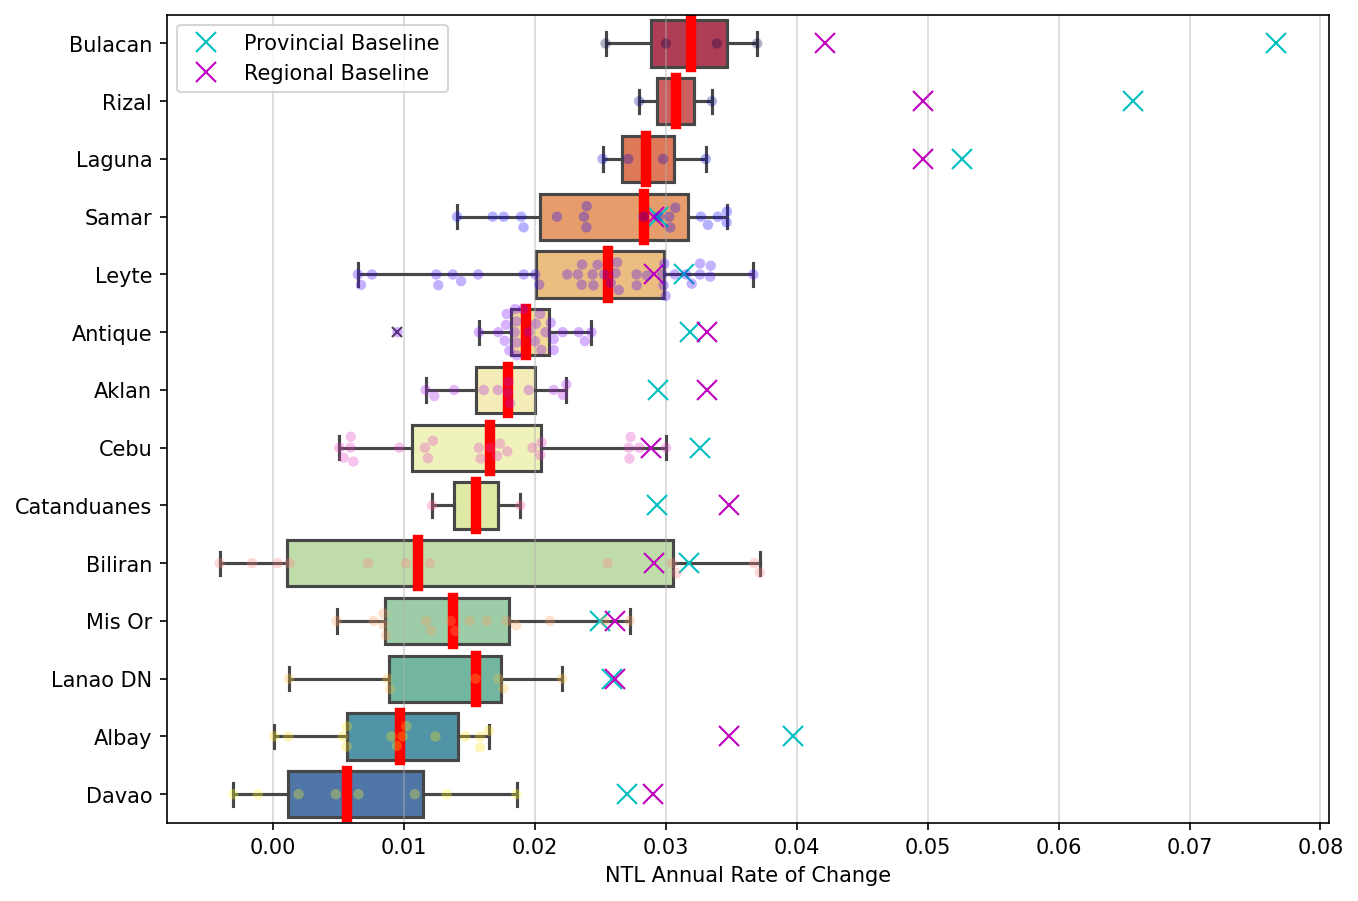

In [ ]:
plt.figure(figsize = (10,7), dpi = 150)
plt.grid(alpha = 0.5)
sns.boxplot(data_sorted[2:], palette="Spectral", orient = 'h',
                flierprops={"marker": "x"}, medianprops={"color": "r", "linewidth": 5})
sns.swarmplot(data_sorted[2:], palette = 'gnuplot2', orient = 'h', alpha = 0.3)
# for i in range(len(data.columns)):
#     plt.plot([0,len(data.columns)], [0, data_sorted[2:].median()[i]], color = plt.cm.Spectral(i/len(data.columns)))

plt.plot(data_sorted[0:1].values.T, np.arange(len(data.columns)), 'cx', label = 'Provincial Baseline', ms = 10)
plt.plot(data_sorted[1:2].values.T, np.arange(len(data.columns)), 'mx', label = 'Regional Baseline', ms = 10)
# plt.title('NTL rate of change of post-disaster resettlement sites in the Philippines (2014-2022)')
# plt.ylabel("Resettlement Sites")
plt.xlabel("NTL Annual Rate of Change")
plt.legend()

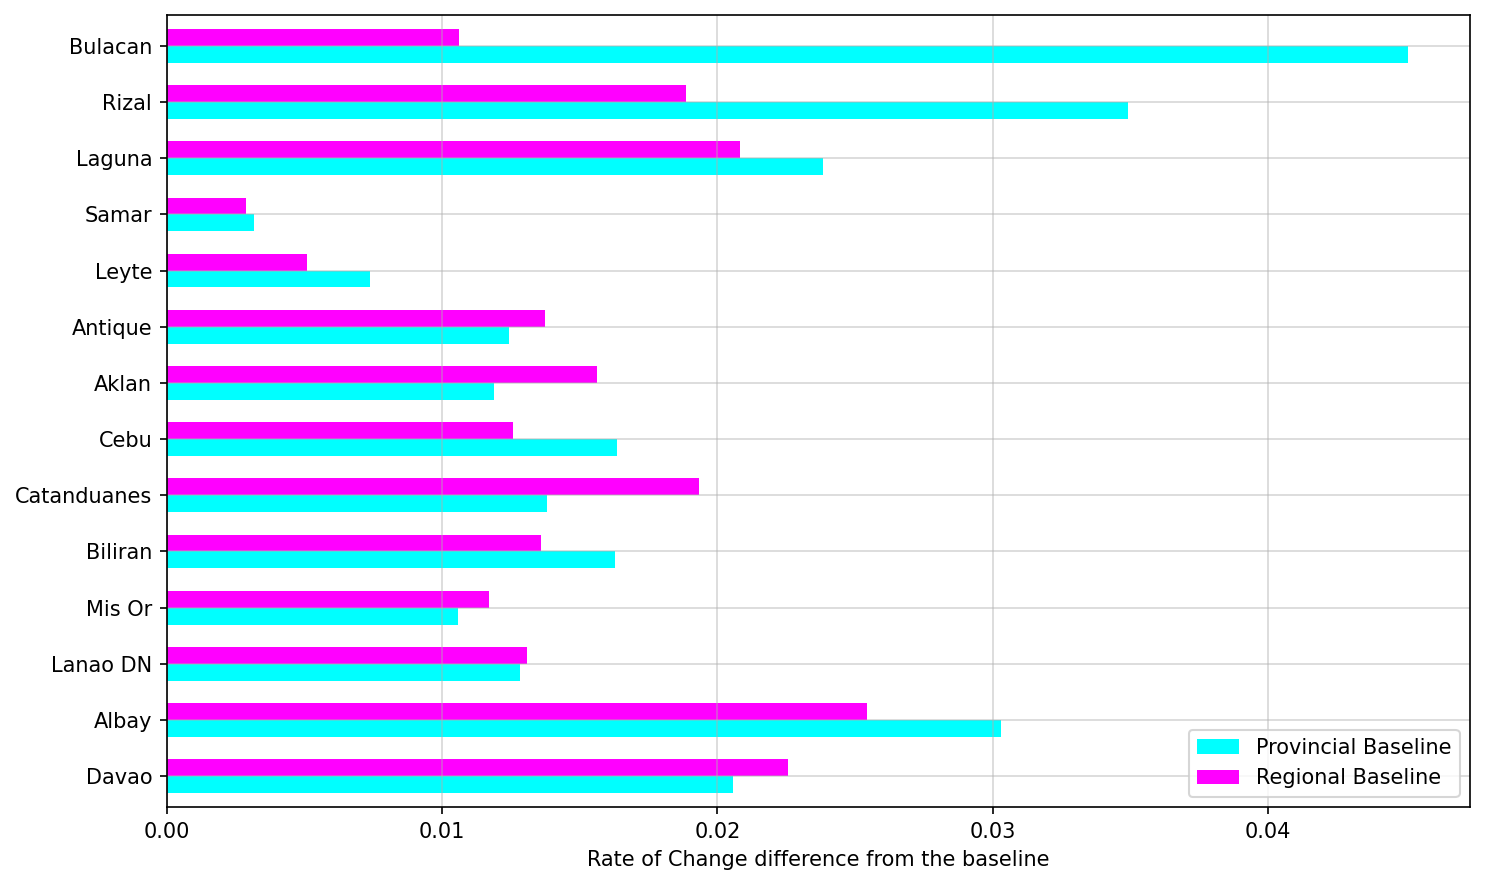

In [ ]:
index_sort = data[2:].mean().sort_values(ascending = True).index
data_sorted = data[index_sort]
data_sorted
plt.rcParams["figure.dpi"] = 150

d = {'Provincial Baseline': data_sorted[0:1].values[0] - data_sorted[2:].mean().values,
     'Regional Baseline': data_sorted[1:2].values[0] - data_sorted[2:].mean().values}
diff = pd.DataFrame(data=d, index=data_sorted.columns)
diff.plot(y=['Provincial Baseline', 'Regional Baseline'], kind = 'barh',
          color={'Provincial Baseline': "cyan", 'Regional Baseline': "magenta"},
          figsize = (10,6), width=0.6)
plt.grid(alpha = 0.5)

plt.xlabel("Rate of Change difference from the baseline", fontsize = 10)
plt.tight_layout()
plt.show()
# plt.xlim(0,0.08)
# data_sorted[1:2].values[0] - data_sorted[2:].mean().values

In [ ]:
data_sorted.columns

Index(['Bulacan', 'Rizal', 'Laguna', 'Samar', 'Leyte', 'Antique', 'Aklan',
       'Cebu', 'Catanduanes', 'Biliran', 'Mis Or', 'Lanao DN', 'Albay',
       'Davao'],
      dtype='object')

<BarContainer object of 14 artists>

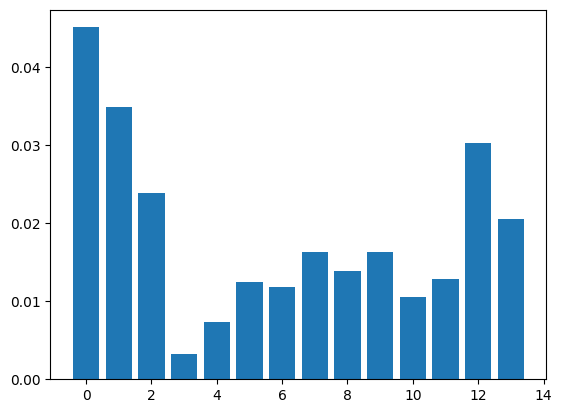

In [ ]:
plt.bar(np.arange(len(data.columns)),diff['Provincial difference'])
plt.bar(np.arange(len(data.columns)),diff['Provincial difference'])


In [ ]:
sns.barplot()

array(['Bulacan', 'Rizal', 'Laguna', 'Samar', 'Leyte', 'Antique', 'Aklan',
       'Cebu', 'Catanduanes', 'Biliran', 'Mis Or', 'Lanao DN', 'Albay',
       'Davao'], dtype=object)

In [ ]:
data_sorted[2:].mean().values

array([0.03156308, 0.03073461, 0.02877841, 0.02621171, 0.02399731,
       0.01940291, 0.01754167, 0.01628347, 0.01550688, 0.01549916,
       0.01441563, 0.01302667, 0.00939475, 0.00645808])

In [ ]:
for i in range(len(data.columns)):
    data_sorted[2:].loc(i)

ValueError: ignored

TypeError: ignored

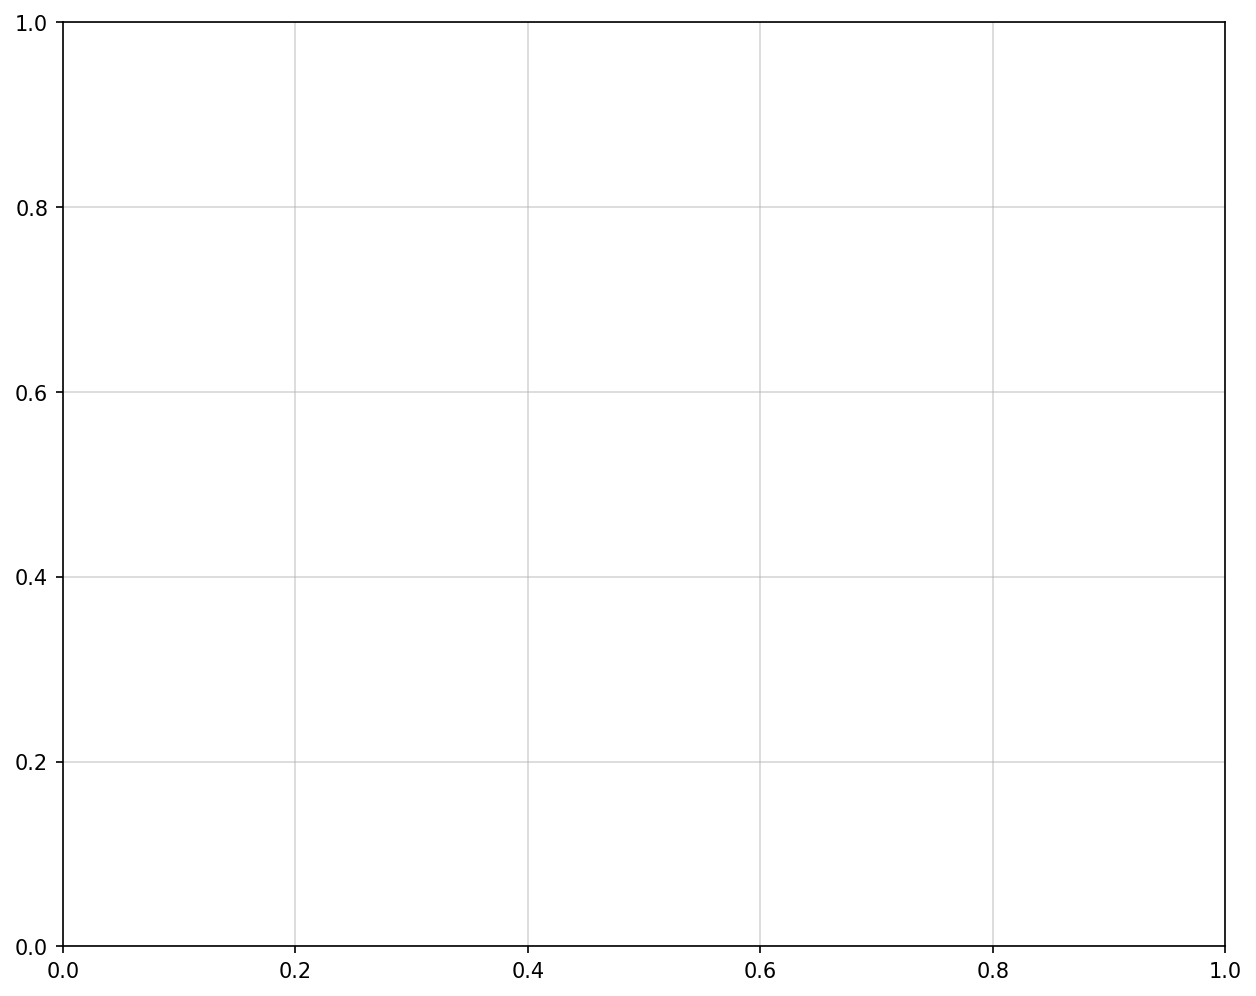

In [ ]:
plt.figure(figsize = (10,8), dpi = 150)
plt.grid(alpha = 0.5)
# sns.boxplot(data_sorted[2:], palette="Spectral", orient = 'h',
#                 flierprops={"marker": "x"}, medianprops={"color": "r", "linewidth": 5})
# # sns.swarmplot(data_sorted[2:], palette = 'gnuplot2', orient = 'h', alpha = 0.3)
# for i in range(len(data.columns)):
#     plt.plot([0,len(data.columns)], [0, data_sorted[2:].median()[i]], color = plt.cm.Spectral(i/len(data.columns)))

plt.barh((data_sorted[0:1].values[0] - data_sorted[2:].mean().values, width = 2)
# plt.bar(data_sorted[1:2].values.T - data_sorted[2:].mean(), np.arange(len(data.columns)))
# plt.title('NTL rate of change of post-disaster resettlement sites in the Philippines (2014-2022)')
plt.ylabel("Resettlement Sites")
plt.xlabel("NTL Annual Rate of Change")
plt.legend()

## Summary

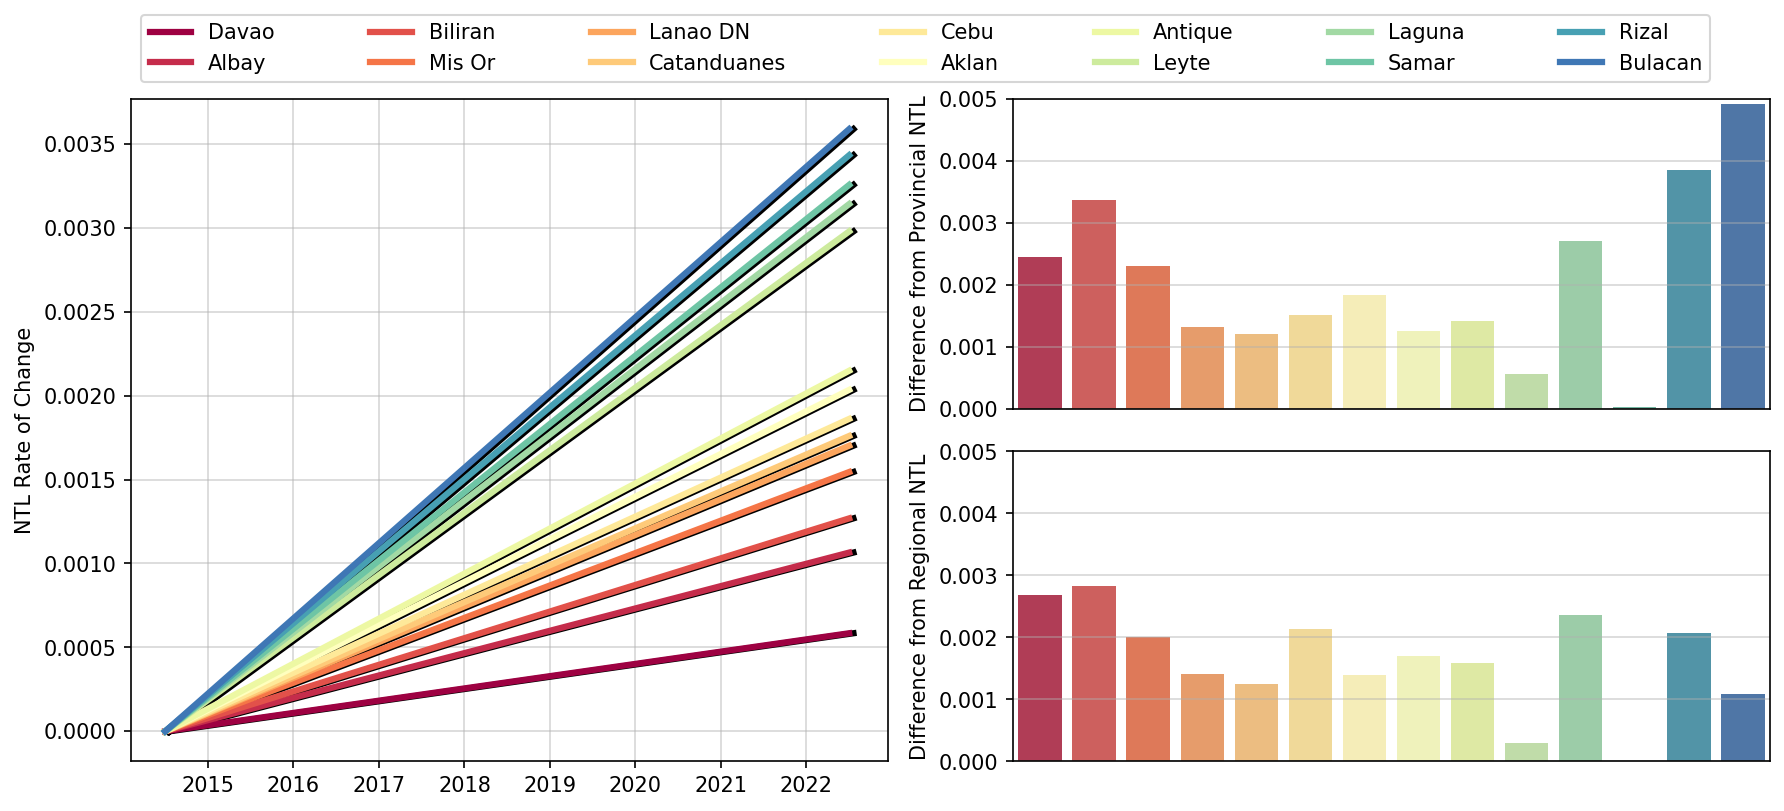

In [ ]:
fig = plt.figure(constrained_layout=True, figsize = (12,5), dpi = 150)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[:,0])
ax1.grid(alpha = 0.5)
for i in range(len(data.columns)):
    ax1.plot([2014.55,2022.55], [0, data_sorted[2:].median()[i]], lw = 3,
            color = 'k')
for i in range(len(data.columns)):
    ax1.plot([2014.5,2022.5], [0, data_sorted[2:].median()[i]], lw = 3,
             color = plt.cm.Spectral(i/len(data.columns)), label = str(data_sorted.columns[i]))
ax1.set_ylabel('NTL Rate of Change')
fig.legend(fontsize=10, ncol = 7, bbox_to_anchor= (0, 1.01, 2.1, 0.2), loc="lower left",
            bbox_transform=ax1.transAxes, fancybox = True, mode='expand')

ax2 = fig.add_subplot(spec[0,1])
ax2.set_ylabel('Difference from Provincial NTL')
sns.barplot(data_sorted[0:1]-data_sorted[2:].median(), palette="Spectral")
ax2.grid(alpha = 0.5)
ax2.set_ylim(0,0.005)
plt.xticks([])

ax3 = fig.add_subplot(spec[1,1])
ax3.set_ylabel('Difference from Regional NTL')
sns.barplot(data_sorted[1:2]-data_sorted[2:].median(), palette="Spectral")
ax3.grid(alpha = 0.5)
ax3.set_ylim(0,0.005)
plt.xticks([])

plt.tight_layout()
plt.show()

# Seasonality Analysis

In [ ]:
Leyte_df['Seasonality']

Leyte Province  Region VIII  Kawayan Ville  Villa Diana  \
date                                                                  
2014-01-01       -0.103132    -0.098371       0.020012     0.027763   
2014-02-01       -0.041838    -0.038405       0.012527    -0.039290   
2014-03-01        0.059328     0.042988      -0.181156    -0.148180   
2014-04-01        0.144660     0.132693      -0.171002    -0.211562   
2014-05-01        0.124580     0.106606       0.295289     0.397323   
...                    ...          ...            ...          ...   
2022-07-01       -0.024151    -0.014741       0.600297     0.604459   
2022-08-01        0.027401     0.030899      -0.030288    -0.040270   
2022-09-01        0.008095     0.007868      -0.155892    -0.143988   
2022-10-01       -0.066057    -0.030445      -0.064588    -0.067525   
2022-11-01       -0.081935    -0.078388      -0.059587    -0.068058   

            Ridge View Park  New Hope Village  Knightsridge Residences  \
date                                                                     
2014-01-01         0.031110         -0.004142                 0.041233   
2014-02-01        -0.013462         -0.038194                -0.027929   
2014-03-01        -0.146681         -0.153052                -0.152547   
2014-04-01        -0.231677         -0.217995                -0.206950   
2014-05-01         0.331590          0.354056                 0.277385   
...                     ...               ...                      ...   
2022-07-01         0.830588          0.878136                 0.707635   
2022-08-01        -0.079603         -0.085427                -0.023550   
2022-09-01        -0.153193         -0.150404                -0.165988   
2022-10-01        -0.104706         -0.096208                -0.079508   
2022-11-01        -0.117588         -0.108914                -0.072068   

            Villa Sofia  North Hill Arbours  Salvacion Heights  ...  \
date                                                            ...   
2014-01-01     0.018104            0.000407           0.017866  ...   
2014-02-01    -0.024743           -0.013678          -0.002433  ...   
2014-03-01    -0.172574           -0.173536          -0.089915  ...   
2014-04-01    -0.173412           -0.169973          -0.227916  ...   
2014-05-01     0.399490            0.301009           0.262256  ...   
...                 ...                 ...                ...  ...   
2022-07-01     0.594835            0.648098           0.742986  ...   
2022-08-01    -0.034799           -0.039374          -0.055678  ...   
2022-09-01    -0.143838           -0.147396          -0.124520  ...   
2022-10-01    -0.054159           -0.061379          -0.076677  ...   
2022-11-01    -0.054736           -0.059380          -0.076449  ...   

            Villa Soledad  Virlyn Heights Subdivision  Tabango Ville  \
date                                                                   
2014-01-01       0.113296                    0.050744       0.059906   
2014-02-01      -0.050066                    0.007425      -0.005925   
2014-03-01      -0.054252                   -0.103459      -0.103440   
2014-04-01      -0.164616                   -0.137074      -0.167036   
2014-05-01       0.189255                    0.332070       0.237063   
...                   ...                         ...            ...   
2022-07-01       0.109342                    0.236655       0.296021   
2022-08-01      -0.038089                    0.025407       0.073328   
2022-09-01      -0.068896                   -0.046771      -0.078371   
2022-10-01       0.020772                   -0.020538      -0.043537   
2022-11-01       0.019688                   -0.049045      -0.023298   

            Dulag Town Ville  Barugo Town Ville   Villa Verde  \
date                                                            
2014-01-01          0.103575            0.078341     0.132085   
2014-02-01          0.023387            0.055096    -0.029619   
2014

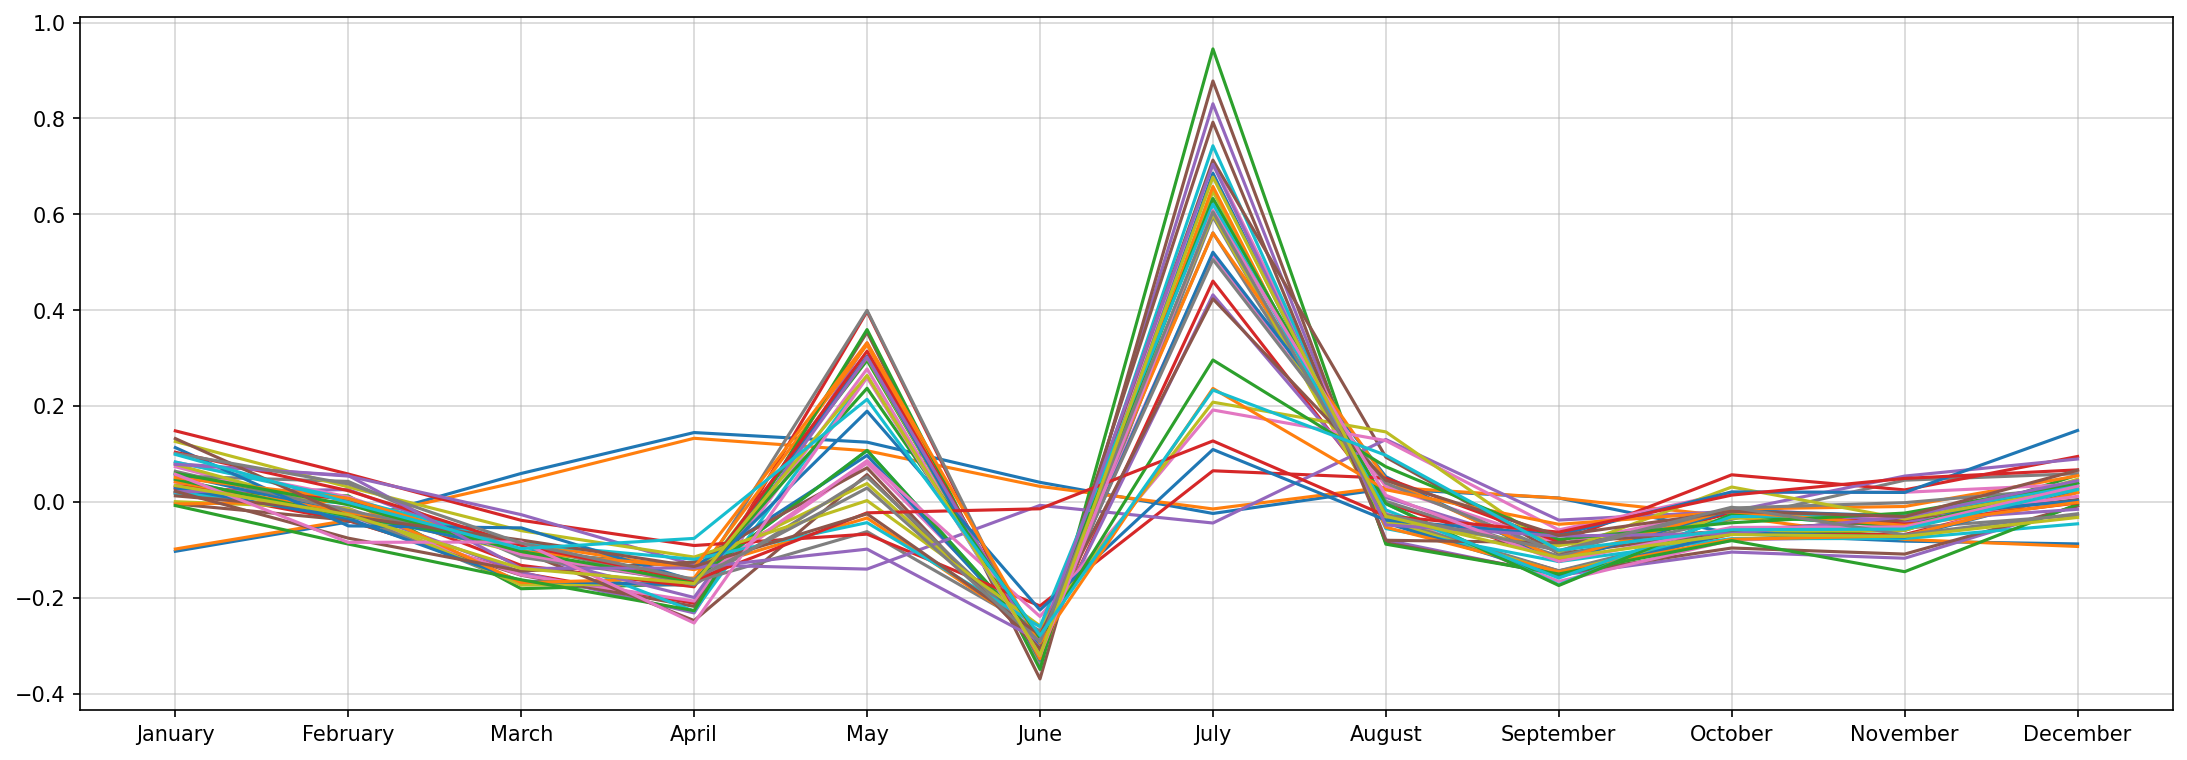

In [ ]:
plt.figure(dpi = 150, figsize = (18,6))
plt.grid(alpha = 0.5)
seasonal = Leyte_df['Seasonality'][:12].rename(index=lambda x: x.strftime('%B'))
ormalized_seasonal=2*((seasonal-seasonal.min())/(seasonal.max()-seasonal.min())-0.5)
plt.plot(seasonal)
plt.show()

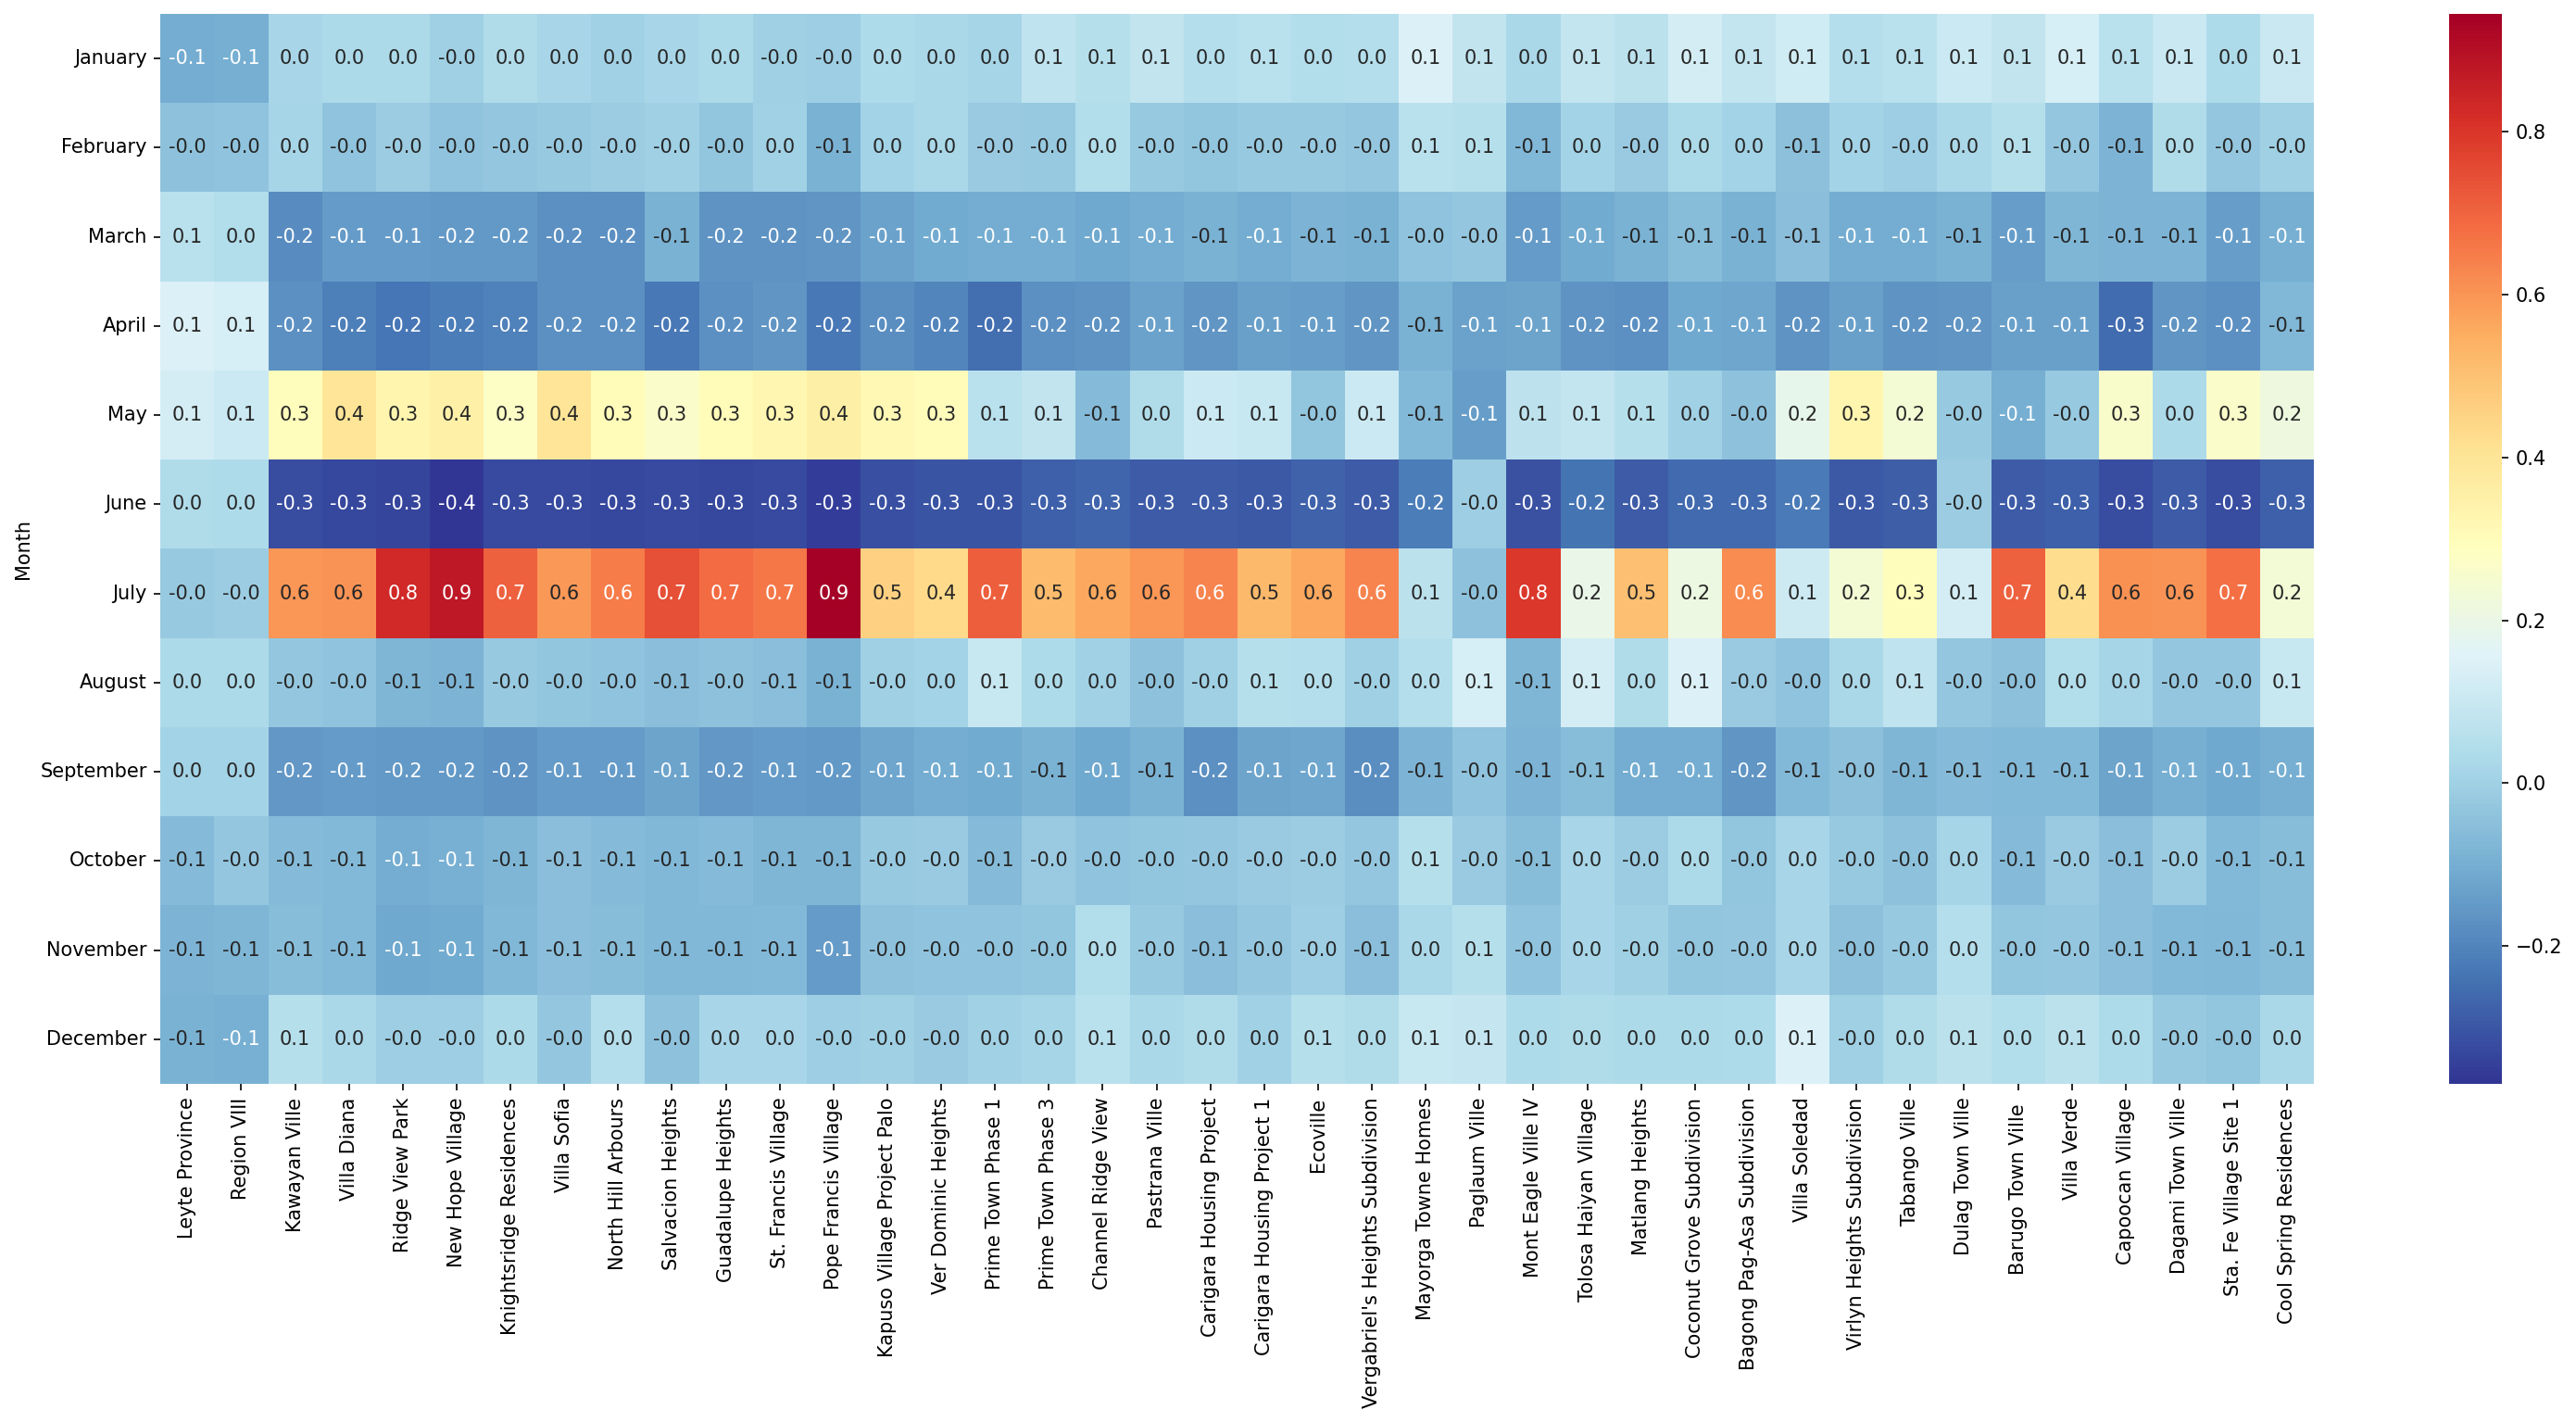

In [ ]:
plt.figure(dpi = 150, figsize = (25,10))
sns.heatmap(seasonal, cmap = 'RdYlBu_r', annot=True, fmt= '0.1f',)
plt.ylabel('Month')
plt.show()

<Axes: ylabel='date'>

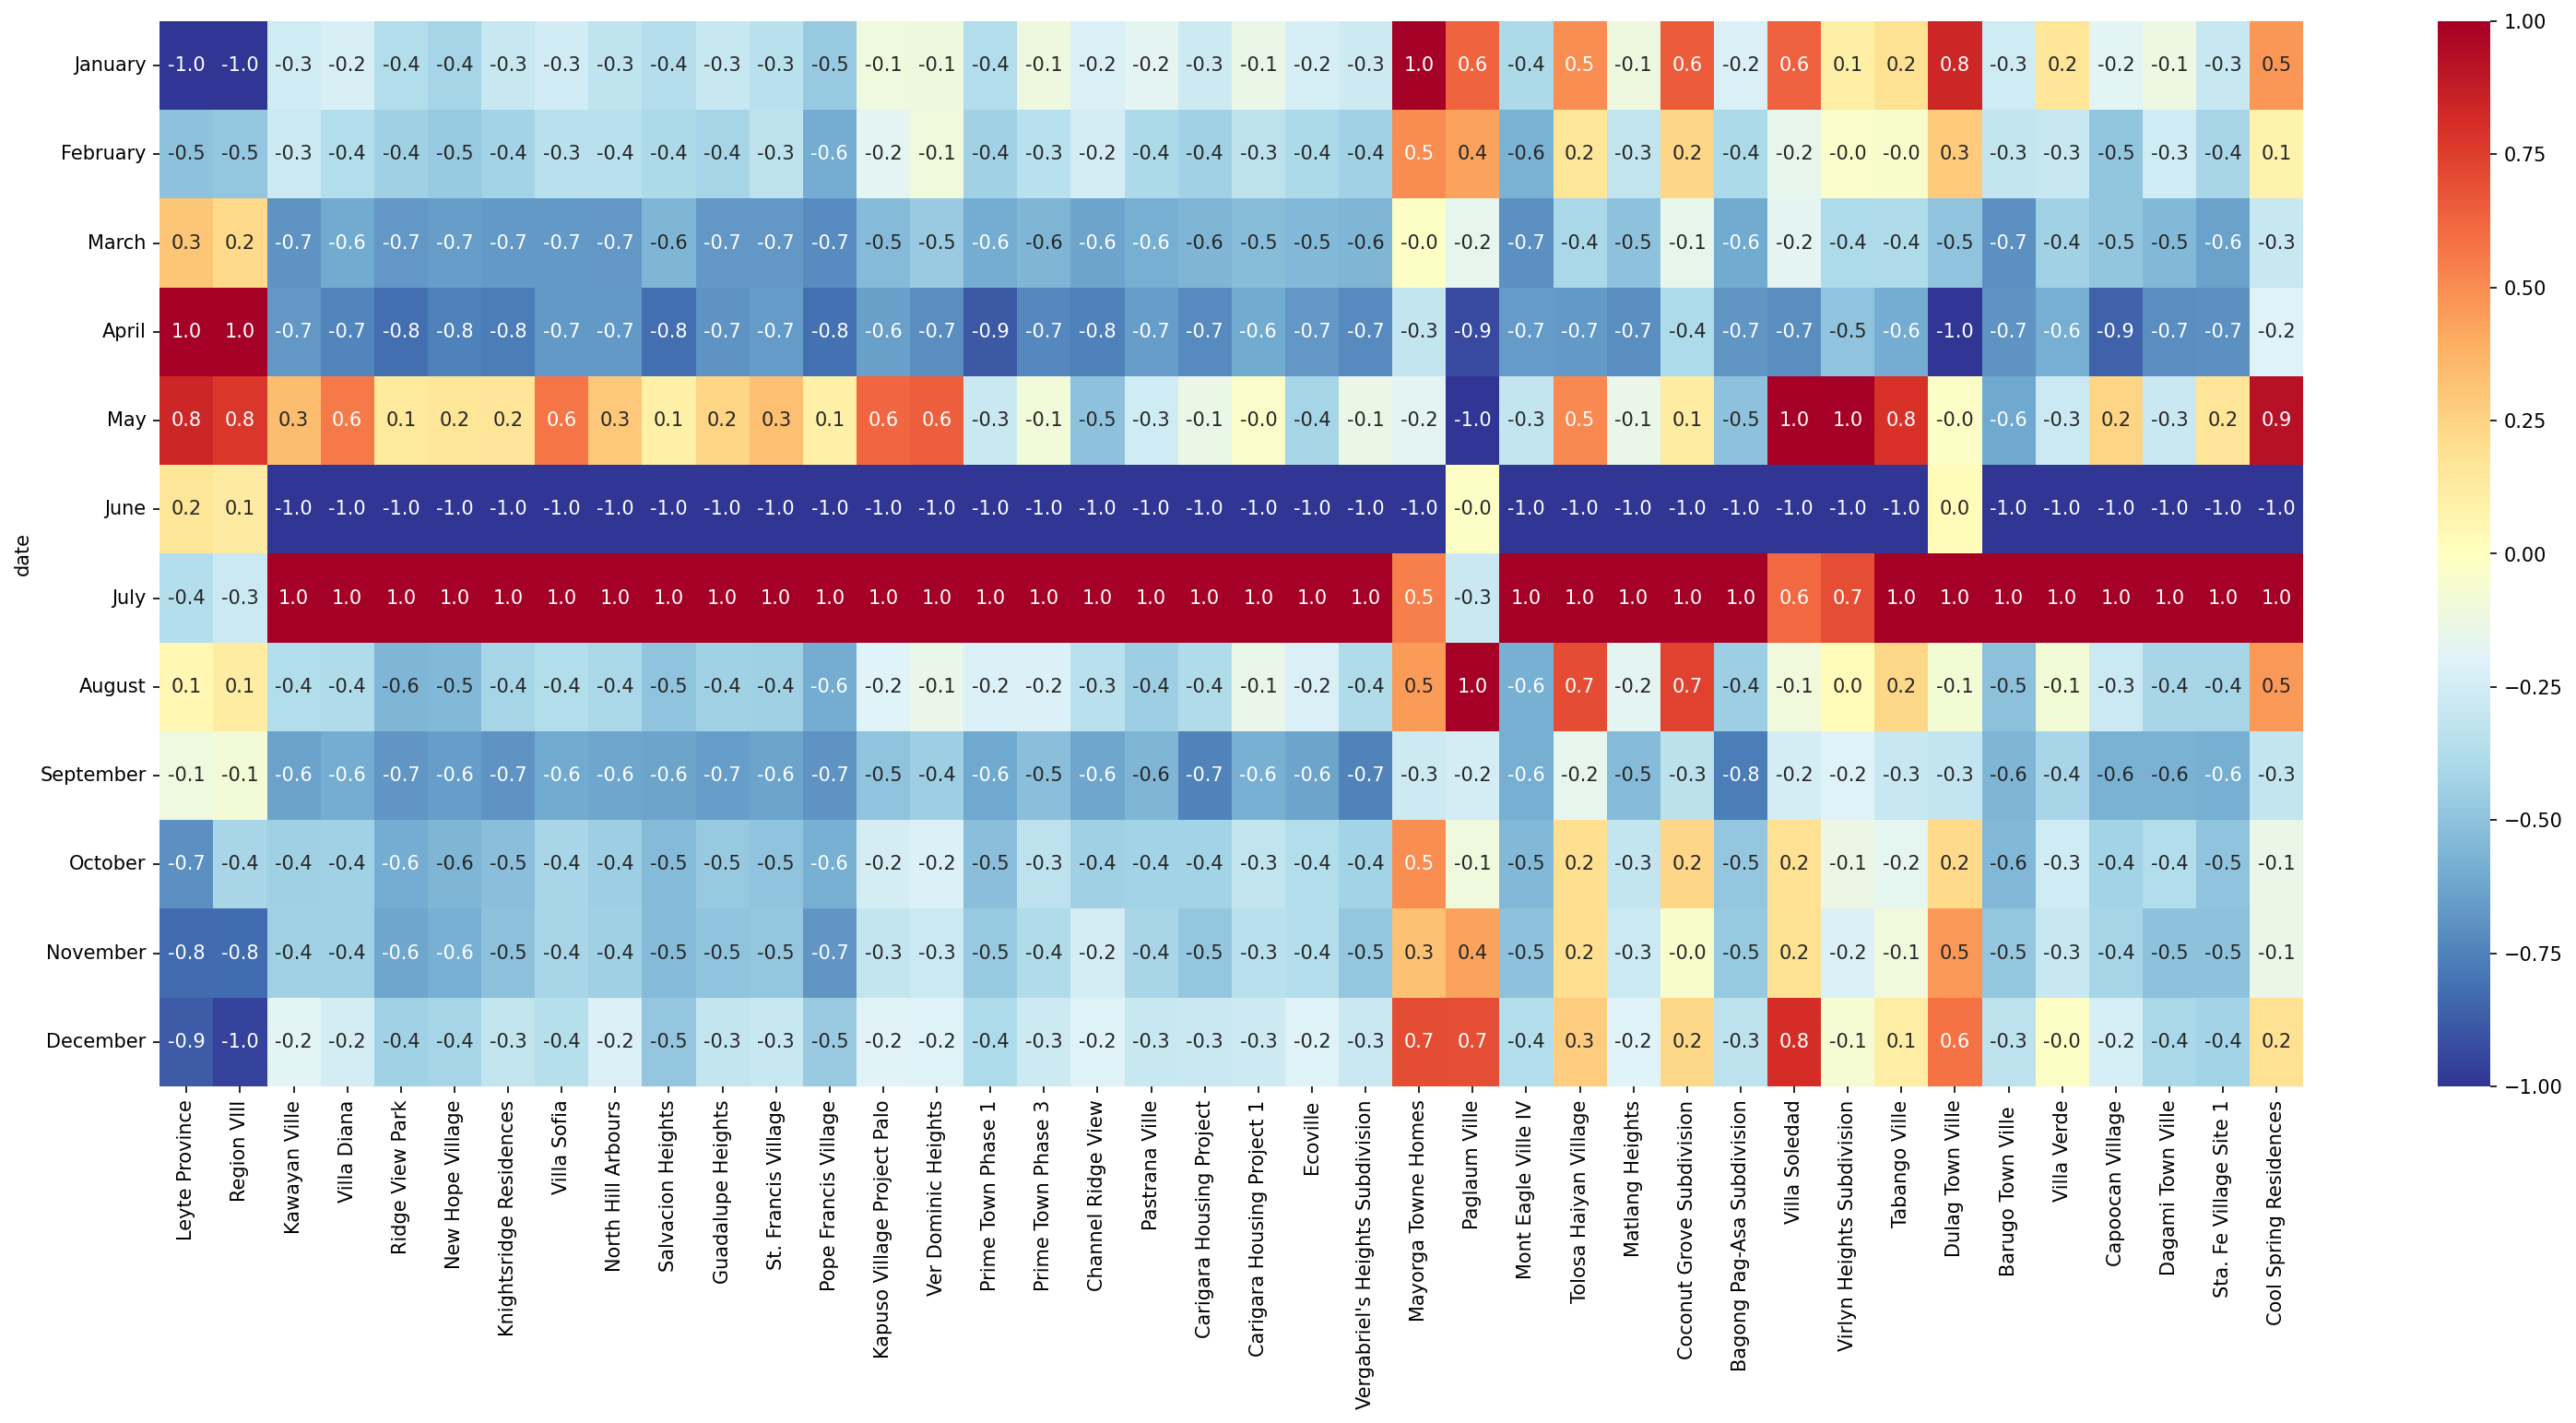

In [ ]:
plt.figure(dpi = 150, figsize = (25,10))
sns.heatmap(normalized_seasonal, cmap = 'RdYlBu_r', annot=True, fmt= '0.1f',)
plt.ylabel('Month')
plt.show()

In [ ]:
def seasonal_variation(df):
    seasonal = df['Seasonality'][:12].rename(index=lambda x: x.strftime('%B'))
    normalized_seasonal=2*((seasonal-seasonal.min())/(seasonal.max()-seasonal.min())-0.5)

    # plt.figure(dpi = 150, figsize = (25,10))
    # sns.heatmap(seasonal, cmap = 'RdYlBu_r', annot=True, fmt= '0.1f',)
    # plt.ylabel('Month')
    # plt.show()

    plt.figure(dpi = 150, figsize = (25,10))
    sns.heatmap(normalized_seasonal, cmap = 'RdYlBu_r', annot=True, fmt= '0.1f',)
    plt.ylabel('Month')
    plt.show()

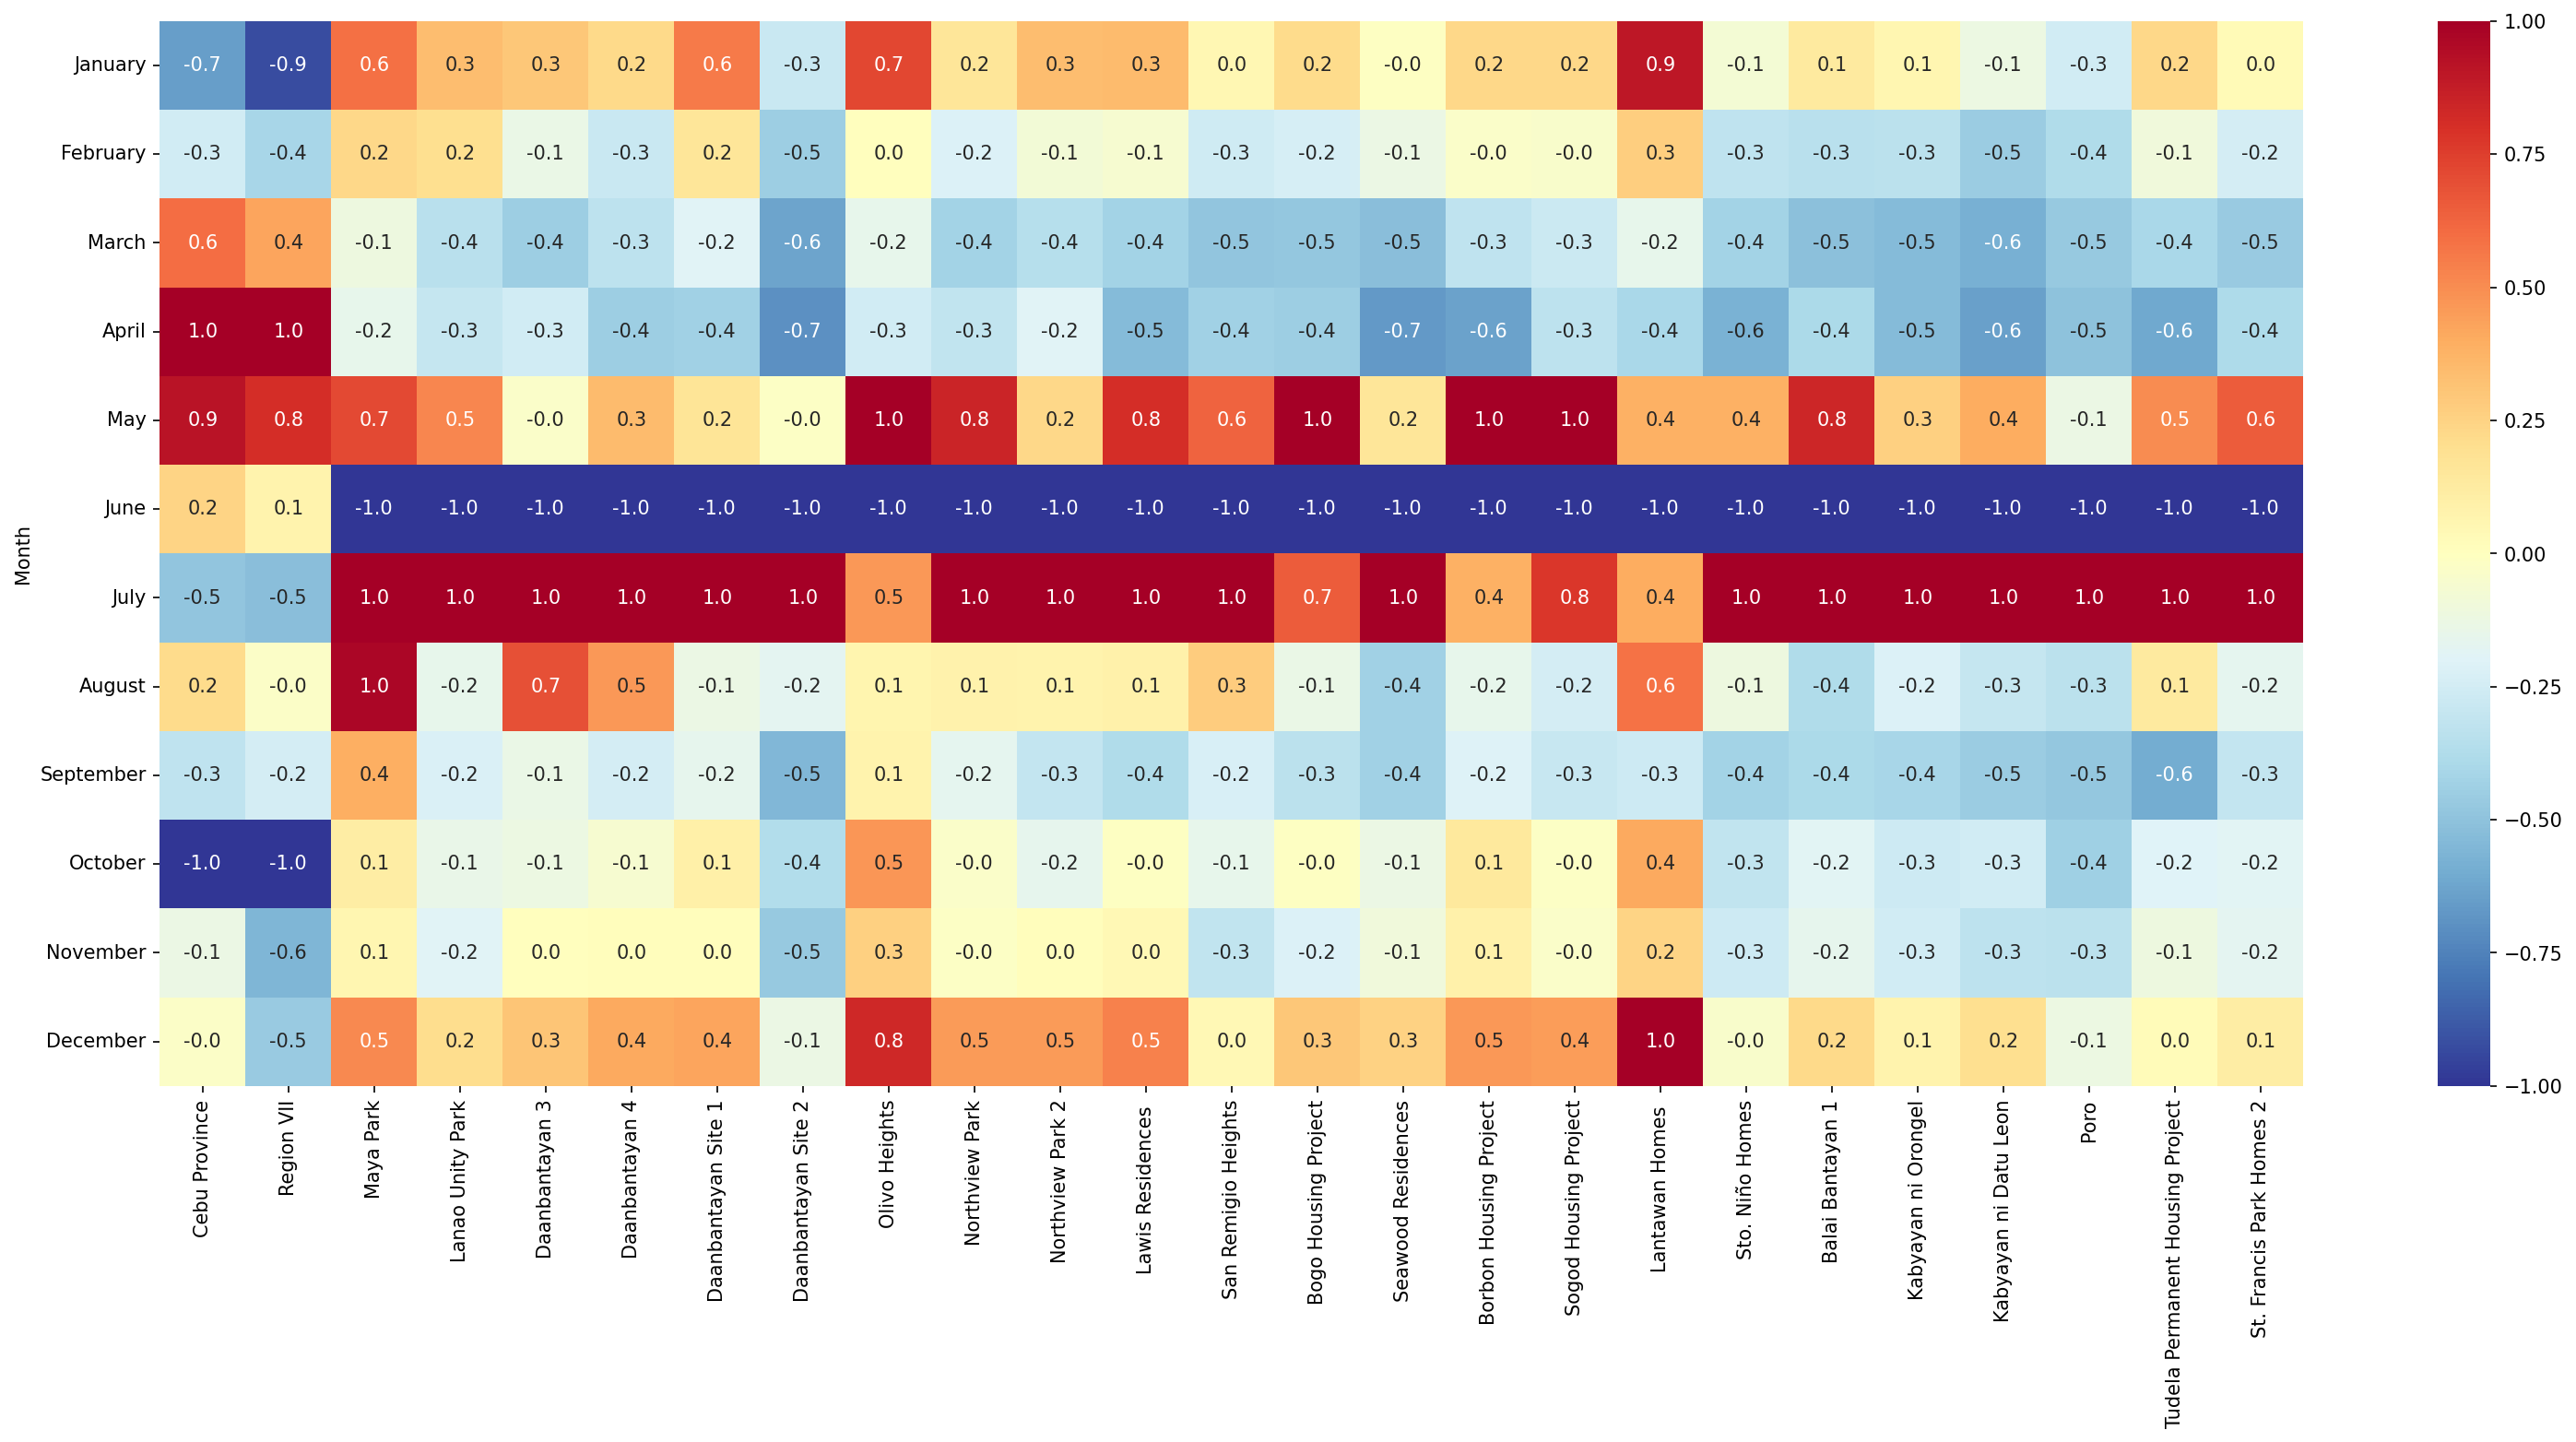

In [ ]:
seasonal_variation(Cebu_df)

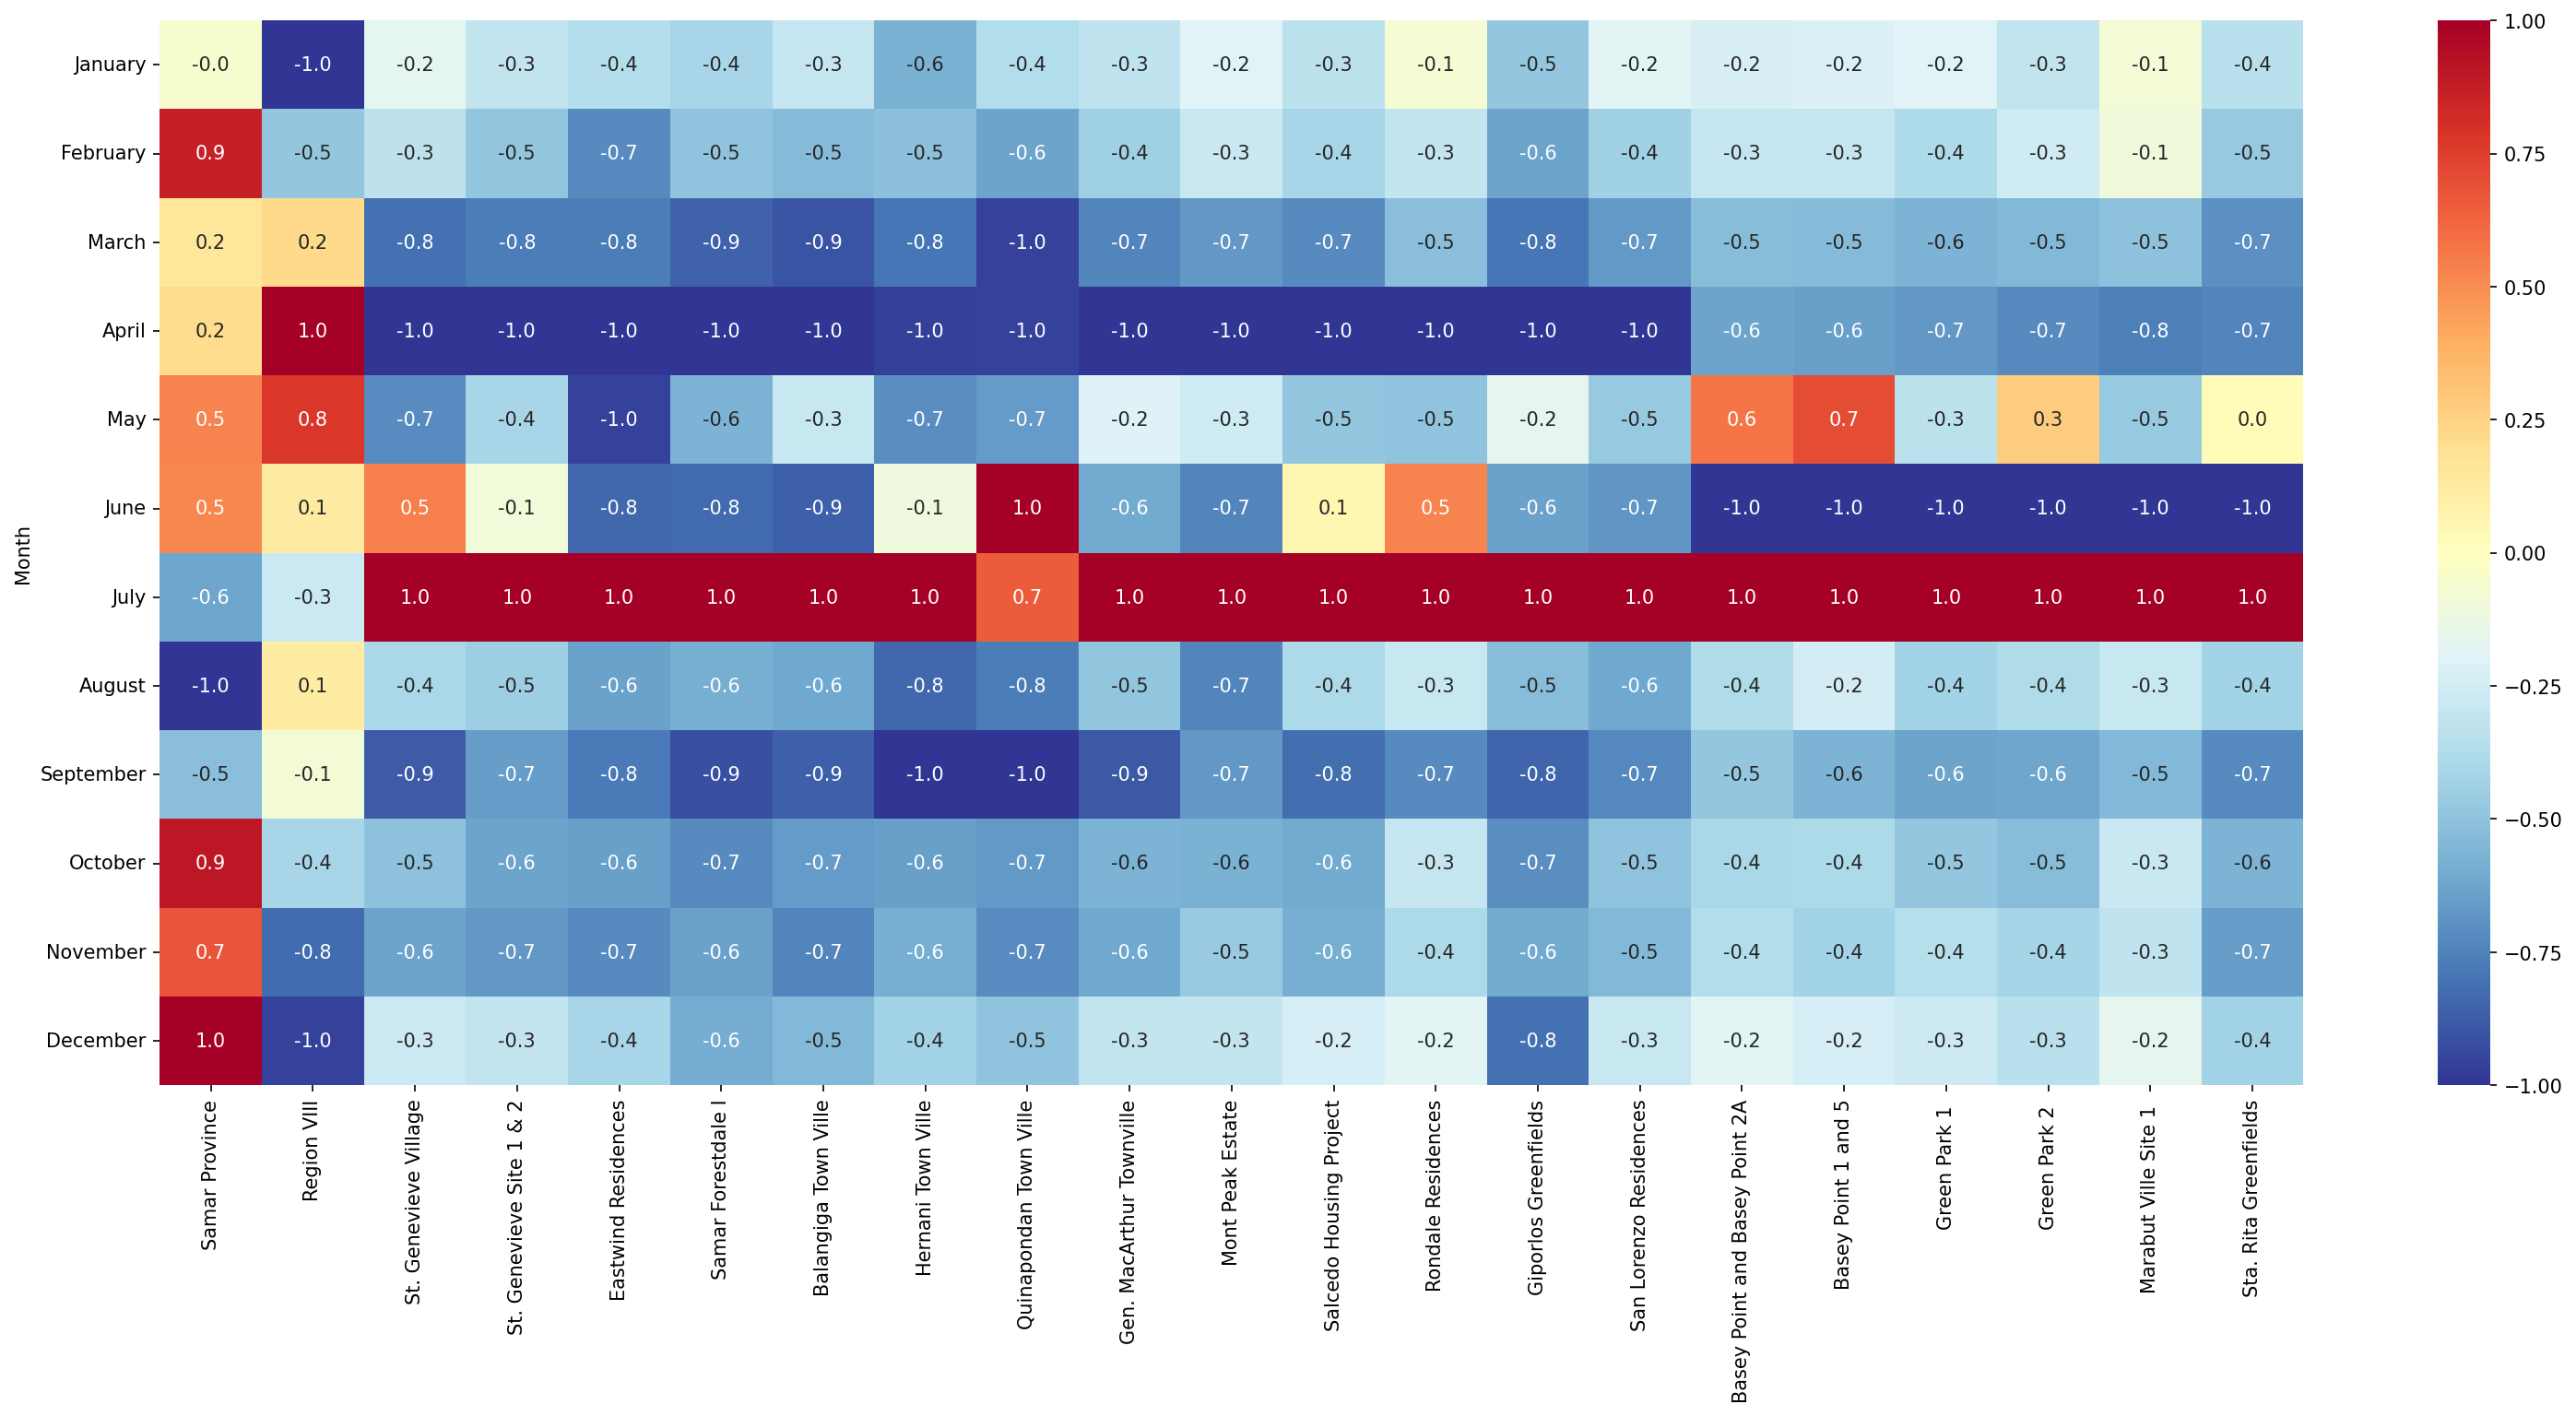

In [ ]:
seasonal_variation(Samar_df)

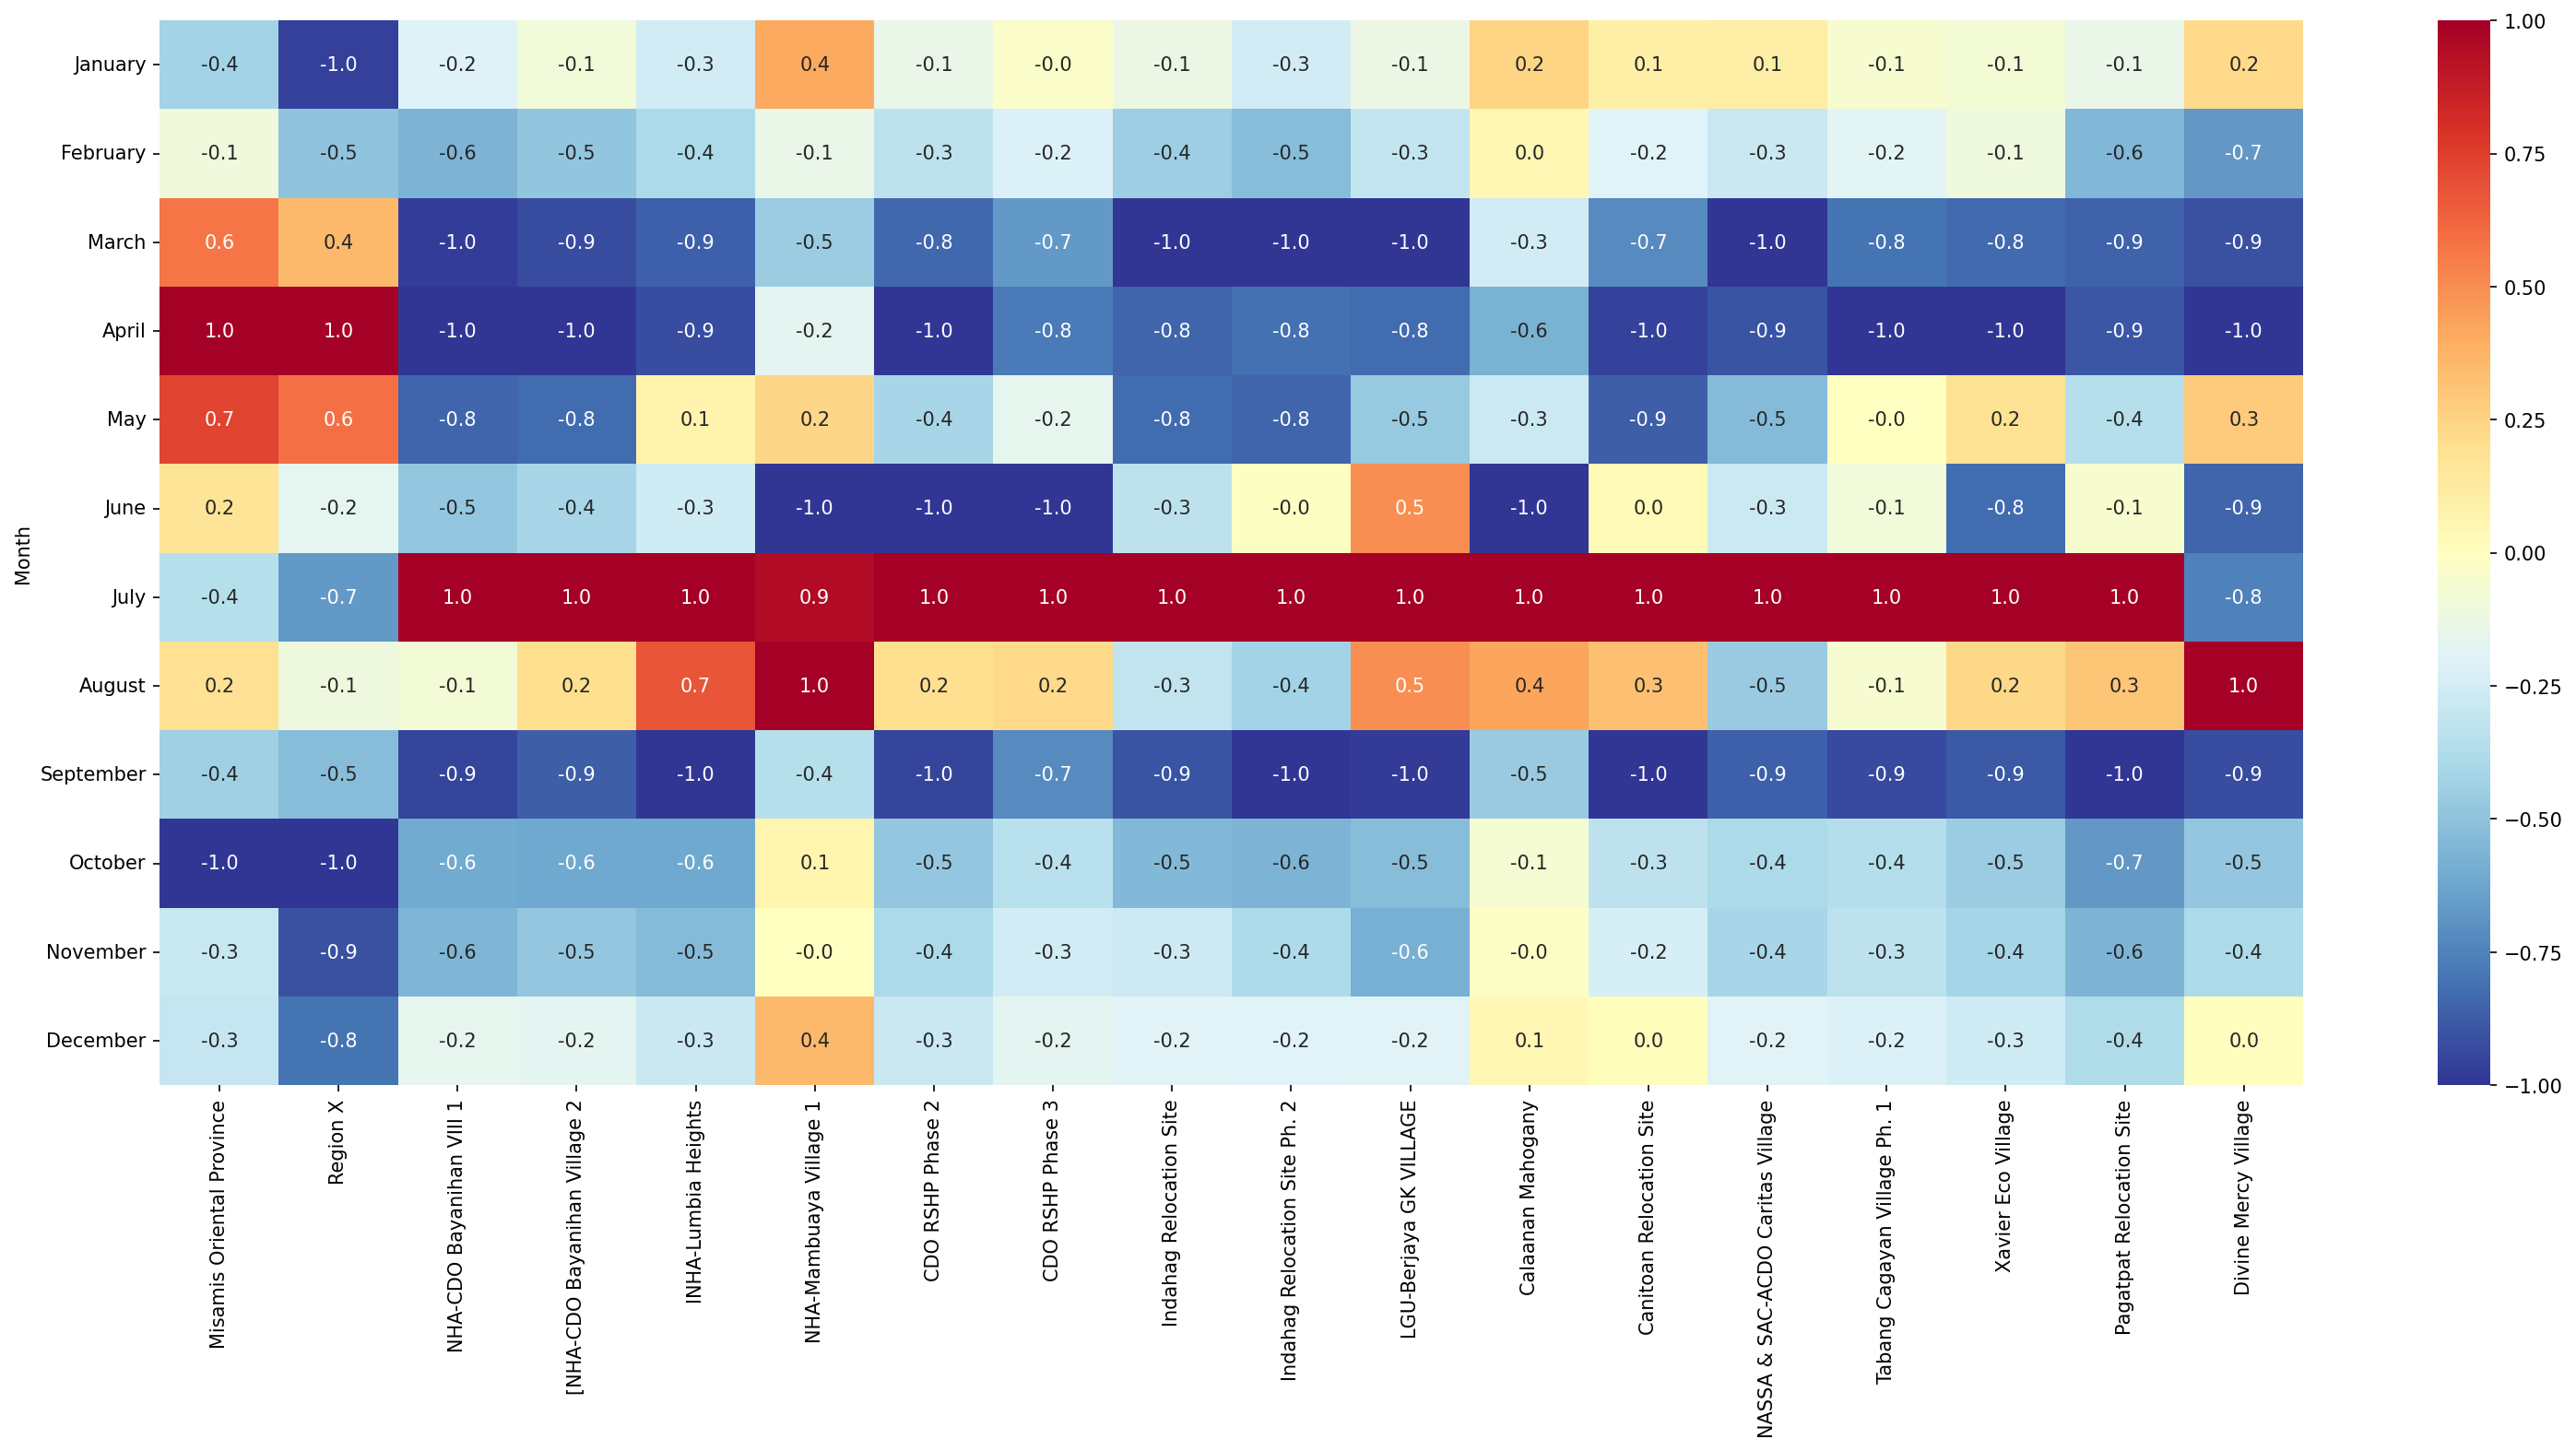

In [ ]:
seasonal_variation(MisOr_df)

In [ ]:
seasonal = Leyte_df['Seasonality'][:12].rename(index=lambda x: x.strftime('%b'))
normalized_seasonal=(seasonal-seasonal.min())/(seasonal.max()-seasonal.min())
normalized_seasonal

Leyte Province  Region VIII  Kawayan Ville  Villa Diana  \
date                                                            
Jan         0.000000     0.000000       0.370582     0.384492   
Feb         0.247360     0.259519       0.362464     0.312926   
Mar         0.655633     0.611774       0.152381     0.196708   
Apr         1.000000     1.000000       0.163396     0.129060   
May         0.918965     0.887100       0.669167     0.778924   
Jun         0.580729     0.565601       0.000000     0.000000   
Jul         0.318739     0.361931       1.000000     1.000000   
Aug         0.526785     0.559454       0.316024     0.311880   
Sep         0.448872     0.459780       0.179785     0.201182   
Oct         0.149622     0.293970       0.278819     0.282791   
Nov         0.085545     0.086482       0.284243     0.282222   
Dec         0.062208     0.023140       0.409651     0.378140   

      Ridge View Park  New Hope Village  Knightsridge Residences  Villa Sofia  \
date                                                                            
Jan          0.316073          0.292757                 0.355136     0.373755   
Feb          0.277943          0.265461                 0.288208     0.327229   
Mar          0.163979          0.173389                 0.167618     0.166705   
Apr          0.091268          0.121330                 0.114973     0.165796   
May          0.573124          0.579893                 0.583655     0.787884   
Jun          0.000000          0.000000                 0.000000     0.000000   
Jul          1.000000          1.000000                 1.000000     1.000000   
Aug          0.221362          0.227598                 0.292447     0.316310   
Sep          0.158408          0.175512                 0.154612     0.197908   
Oct          0.199887          0.218956                 0.238297     0.295288   
Nov          0.188867          0.208770                 0.245497     0.294660   
Dec          0.282604          0.289262                 0.342380     0.323616   

      North Hill Arbours  Salvacion Heights  ...  Villa Soledad  \
date                                         ...                  
Jan             0.339204           0.320262  ...       0.816847   
Feb             0.324834           0.301233  ...       0.422947   
Mar             0.161741           0.219226  ...       0.412852   
Apr             0.165376           0.089863  ...       0.146741   
May             0.645888           0.549357  ...       1.000000   
Jun             0.000000           0.000000  ...       0.000000   
Jul             1.000000           1.000000  ...       0.807313   
Aug             0.298617           0.251321  ...       0.451826   
Sep             0.188410           0.186787  ...       0.377544   
Oct             0.276168           0.231636  ...       0.593752   
Nov             0.278207           0.231850  ...       0.591139   
Dec             0.387017           0.260633  ...       0.903030   

      Virlyn Heights Subdivision  Tabango Ville  Dulag Town Ville  \
date                                                                
Jan                     0.550886       0.592903          0.918974   
Feb                     0.481730       0.479399          0.643488   
Mar                     0.304712       0.311268          0.252195   
Apr                     0.251049       0.201619          0.000000   
May                     1.000000       0.898349          0.484652   
Jun                     0.000000       0.000000          0.513748   
Jul                     0.847678       1.000000          1.000000   
Aug                     0.510436       0.616043          0.462920   
Sep                     0.395209       0.354491          0.346148   
Oct                     0.437089       0.414549          0.611724   
Nov                     0.391580       0.449445          0.731166   
Dec                     0.468146       0.557310          0.792668   

      Barugo Town Ville   Villa Verde  Capoocan Villag

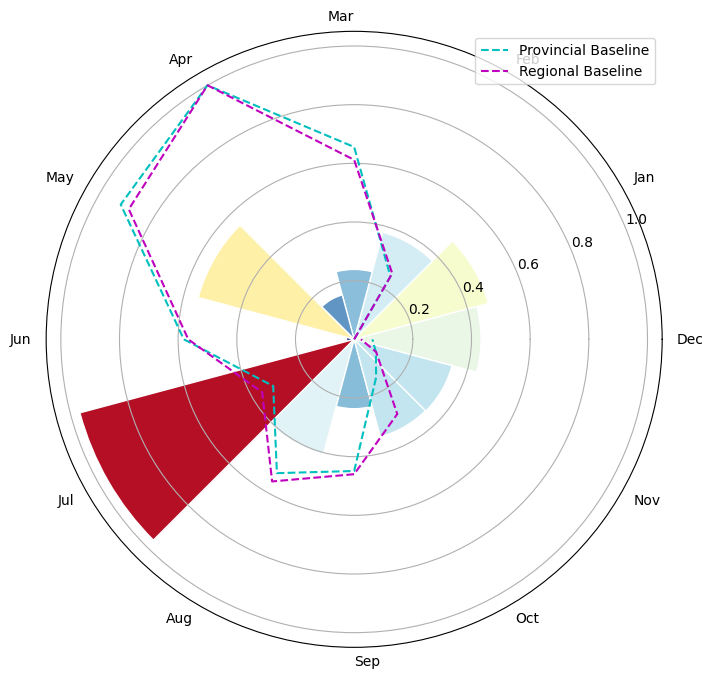

In [ ]:
lowerLimit = 0
pal = list(sns.color_palette(palette='hsv', n_colors=len(seasonal)).as_hex())

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
heights = normalized_seasonal[normalized_seasonal.columns[2:]].mean(axis=1)


width = 2*np.pi / 12
indexes = list(range(1, len(seasonal.index)+1))
angles = [element * width for element in indexes]
ax.plot(angles, normalized_seasonal.iloc[:, 0], 'c--', label = 'Provincial Baseline')
ax.plot(angles, normalized_seasonal.iloc[:, 1], 'm--', label = 'Regional Baseline')


bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                  linewidth=1, edgecolor="white", color=plt.cm.RdYlBu_r(heights)) #color = pal)#

labelPadding = 0.1

for bar, angle, height, label in zip(bars, angles, heights, seasonal.index):
        rotation = np.rad2deg(angle)
        alignment = ""

        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else:
            alignment = "left"

        ax.text(x=angle, y = 1.1,#y=lowerLimit + bar.get_height() + labelPadding,
                s=label, ha=alignment, va='center') #rotation=rotation,
                # rotation_mode="anchor")

        ax.set_thetagrids([], labels=[])
ax.legend()

<PolarAxes: >

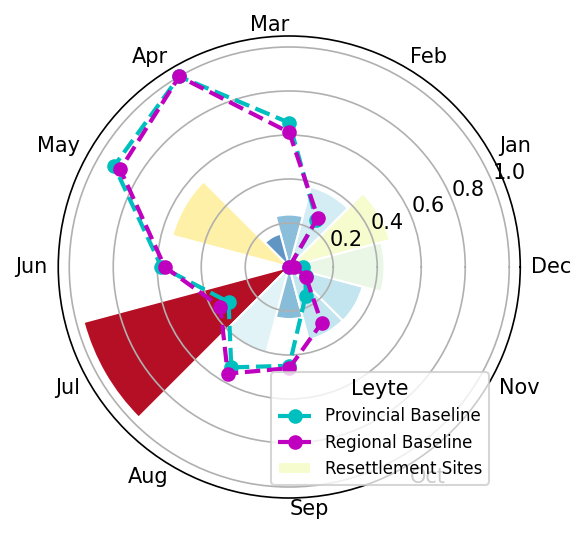

In [ ]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return str(name[:-3])

def seasonal_circle(df):

    seasonal = df['Seasonality'][:12].rename(index=lambda x: x.strftime('%b'))
    normalized_seasonal=(seasonal-seasonal.min())/(seasonal.max()-seasonal.min())

    lowerLimit = 0
    pal = list(sns.color_palette(palette='hsv', n_colors=len(seasonal)).as_hex())

    plt.figure(figsize=(5,4), dpi = 150)
    ax = plt.subplot(111, polar=True)
    heights = normalized_seasonal[normalized_seasonal.columns[2:]].mean(axis=1)


    width = 2*np.pi / 12
    indexes = list(range(1, len(seasonal.index)+1))
    angles = [element * width for element in indexes]
    ax.plot(angles, normalized_seasonal.iloc[:, 0], 'co--', label = 'Provincial Baseline', lw = 2)
    ax.plot(angles, normalized_seasonal.iloc[:, 1], 'mo--', label = 'Regional Baseline', lw = 2)
    # ax.plot(angles, heights, 'ks-', label = 'Resettlement Sites', lw = 3, alpha = 0.5)

    bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit, label = 'Resettlement Sites',
                      linewidth=1, edgecolor="white", color=plt.cm.RdYlBu_r(heights)) #color = pal)#

    labelPadding = 0.1

    for bar, angle, height, label in zip(bars, angles, heights, seasonal.index):
            rotation = np.rad2deg(angle)
            alignment = ""

            if angle >= np.pi/2 and angle < 3*np.pi/2:
                alignment = "right"
                rotation = rotation + 180
            else:
                alignment = "left"

            ax.text(x=angle, y = 1.1,#y=lowerLimit + bar.get_height() + labelPadding,
                    s=label, ha=alignment, va='center') #rotation=rotation,
                    # rotation_mode="anchor")

            ax.set_thetagrids([], labels=[])
    ax.legend(fontsize = 8, title = get_df_name(df),  bbox_to_anchor= (0, 0.09, 0.95, 0.2), fancybox = True)
    return ax


seasonal_circle(Leyte_df)

# Resettlement Seasonality

## Yolanda

<PolarAxes: >

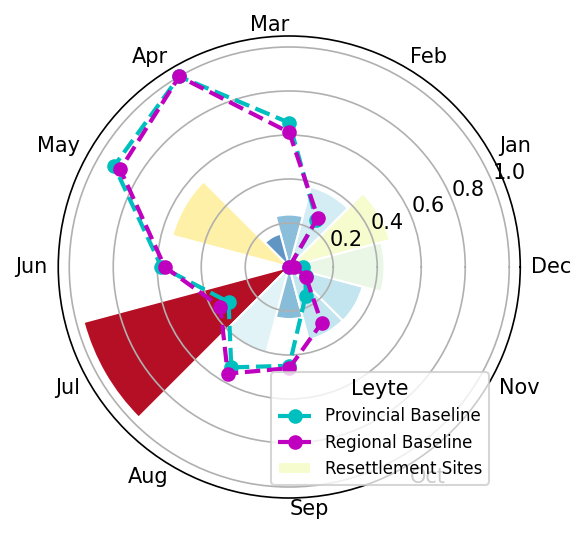

In [ ]:
seasonal_circle(Leyte_df)

<PolarAxes: >

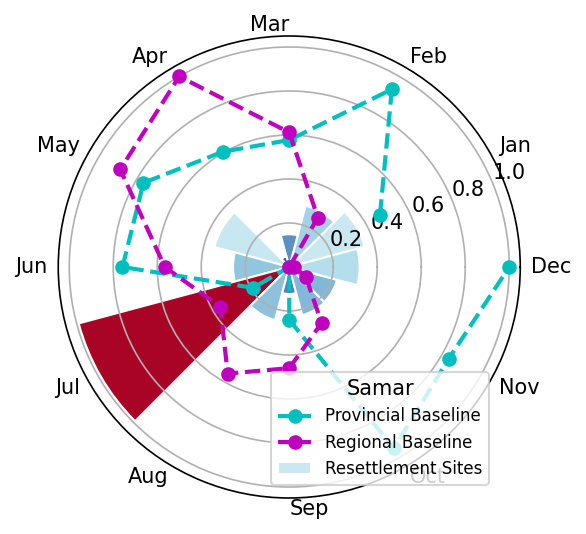

In [ ]:
seasonal_circle(Samar_df)

<PolarAxes: >

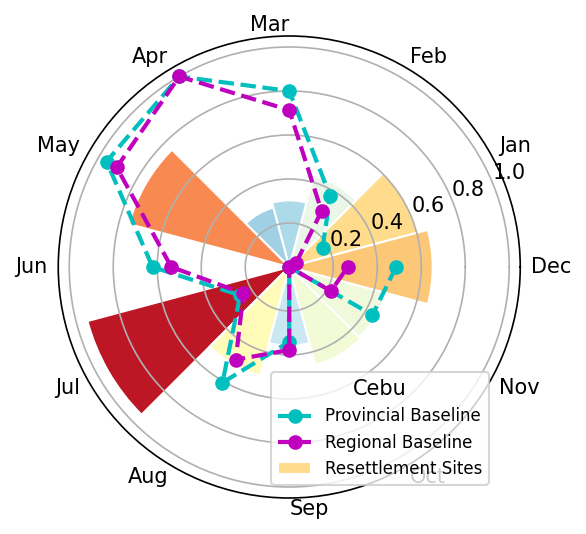

In [ ]:
seasonal_circle(Cebu_df)

<PolarAxes: >

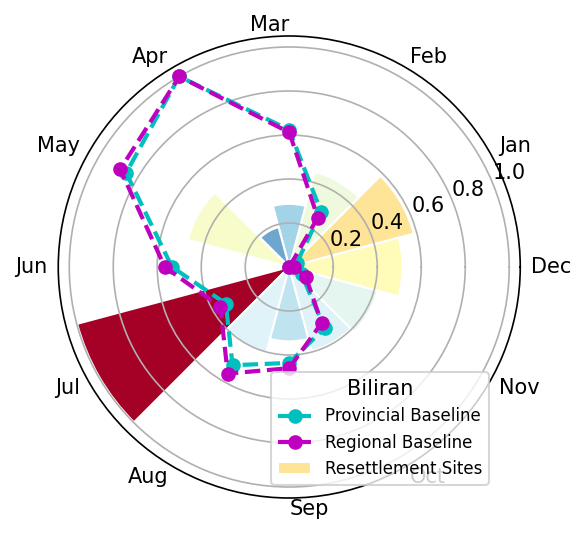

In [ ]:
seasonal_circle(Biliran_df)

## Sendong

<PolarAxes: >

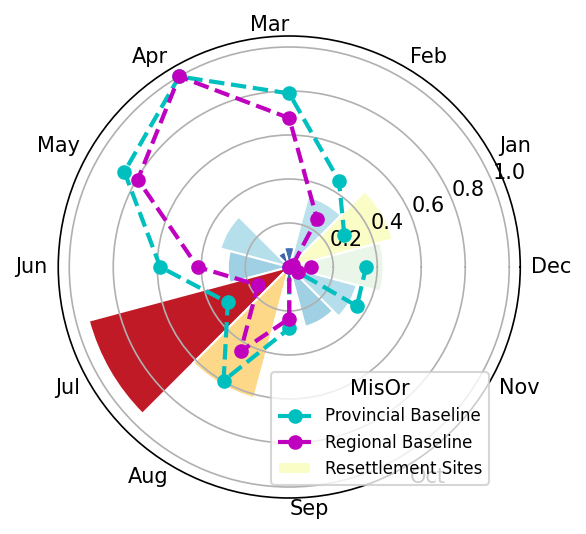

In [ ]:
seasonal_circle(MisOr_df)

<PolarAxes: >

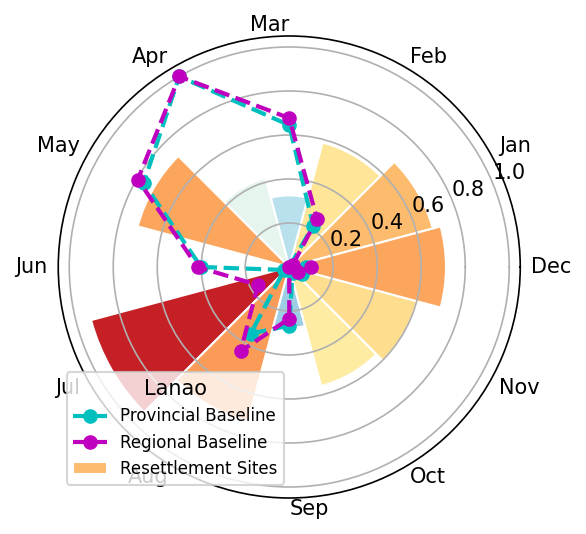

In [ ]:
seasonal_circle(Lanao_df)

## Pablo

<PolarAxes: >

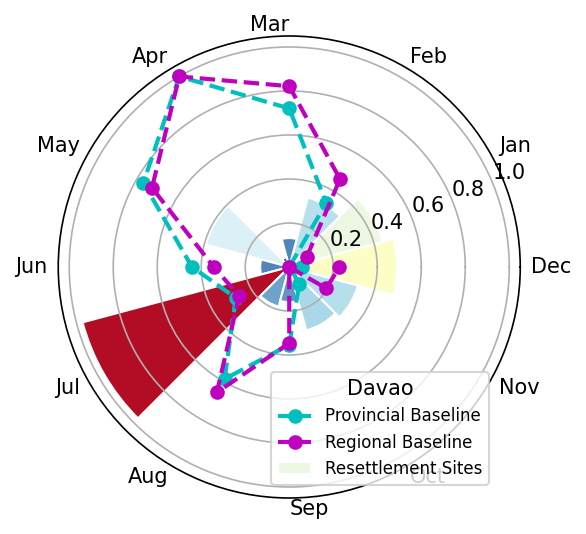

In [ ]:
seasonal_circle(Davao_df)

## Near-Boracay (Yolanda)

<PolarAxes: >

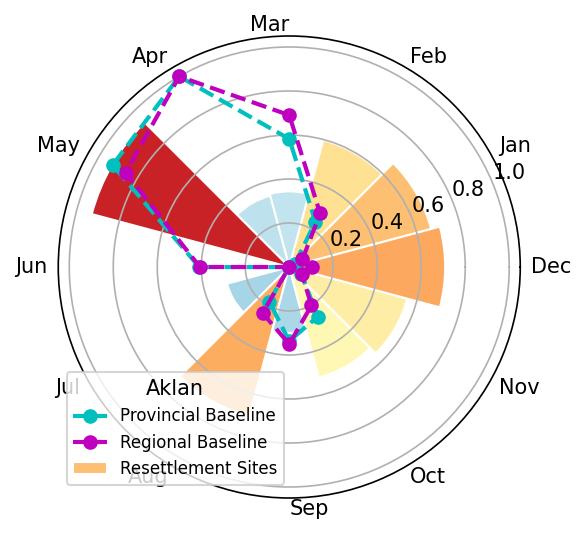

In [ ]:
seasonal_circle(Aklan_df)

<PolarAxes: >

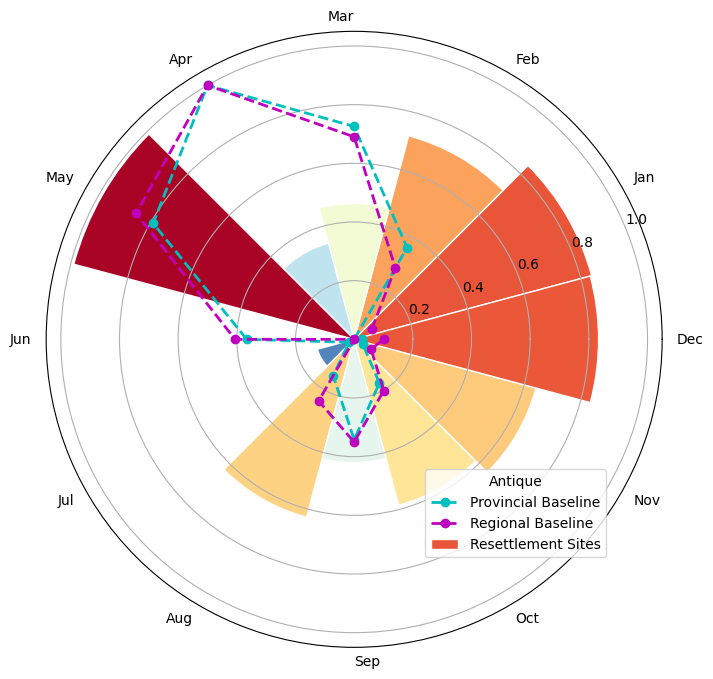

In [ ]:
seasonal_circle(Antique_df)

## Bicol (Multi-storm)

<PolarAxes: >

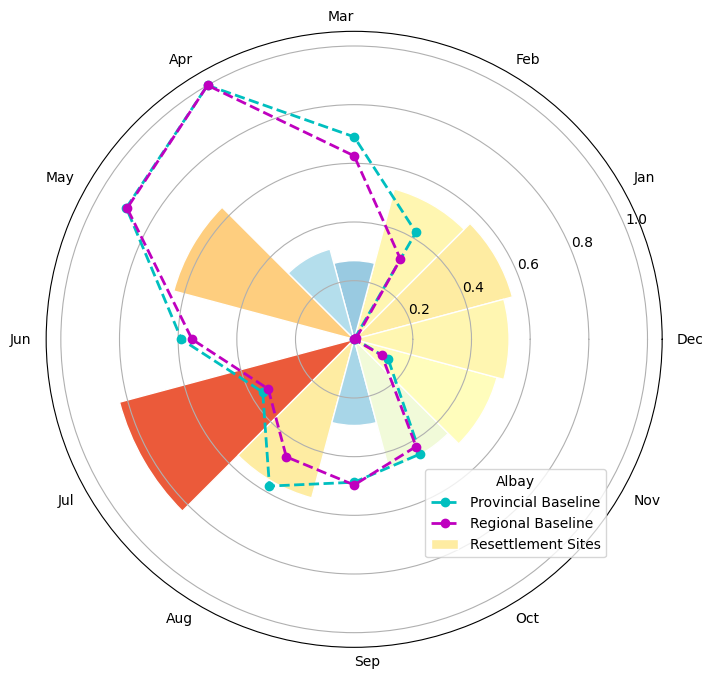

In [ ]:
seasonal_circle(Albay_df)

<PolarAxes: >

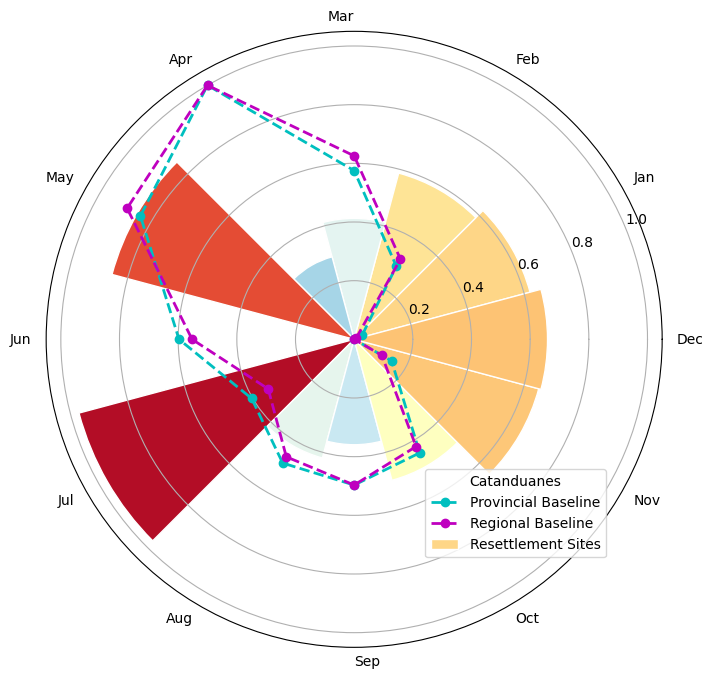

In [ ]:
seasonal_circle(Catanduanes_df)

## Ondoy

<PolarAxes: >

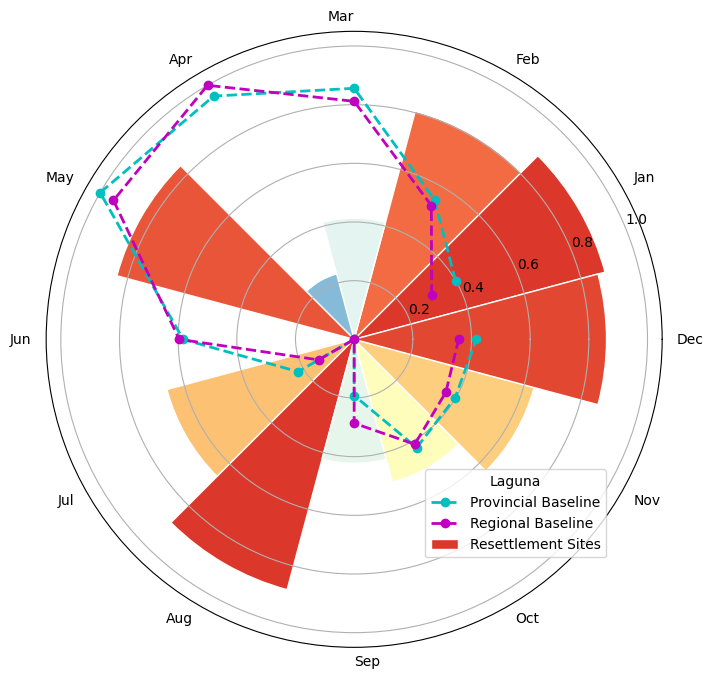

In [ ]:
seasonal_circle(Laguna_df)

<PolarAxes: >

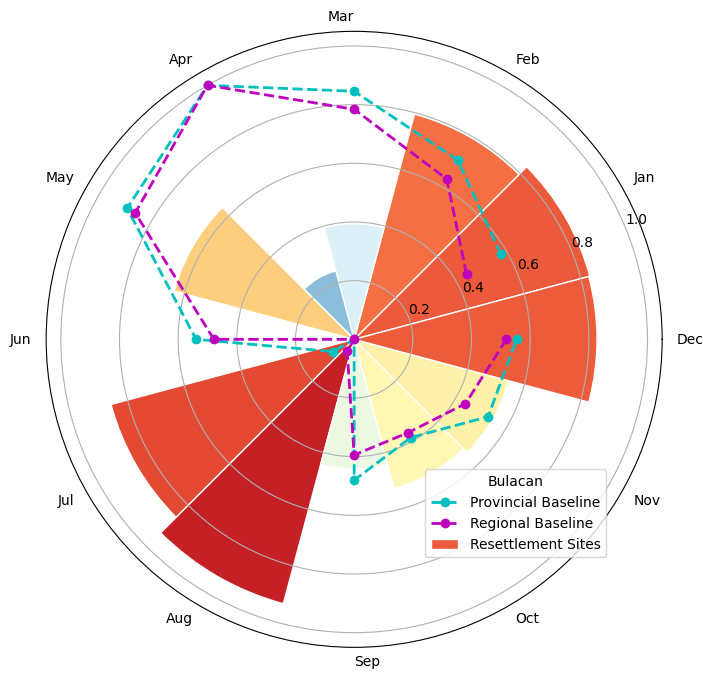

In [ ]:
seasonal_circle(Bulacan_df)

<PolarAxes: >

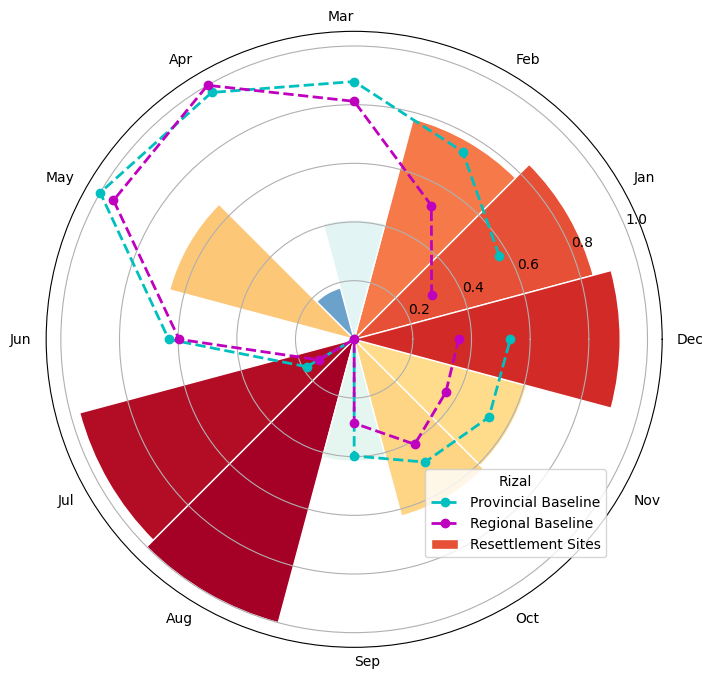

In [ ]:
seasonal_circle(Rizal_df)